## House Pricing (Advanced Regression Techniques)

In [1]:
# import libraries and dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# Read the dataset
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### As Data Analysis Suggests, we will analyse the following

- Missing Values
- All the numerical variables
- Distribution of the numerical variables
- Categorical Variables
- Outliers 
- Relation between Independent & dependent Features 

# step 1 - Identifying Missing values

In [3]:
#missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
# To identify those columns having missing values
features_with_missing = [ feature for feature in df.columns if df[feature].isnull().sum() > 0 ]
features_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
## To obtain percentage of missing values in each of the columns. The values are rounded up using np.round()
for feature in features_with_missing:
    print(feature, np.round(df[feature].isnull().mean()*100) , '% missing values')

LotFrontage 18.0 % missing values
Alley 94.0 % missing values
MasVnrType 1.0 % missing values
MasVnrArea 1.0 % missing values
BsmtQual 3.0 % missing values
BsmtCond 3.0 % missing values
BsmtExposure 3.0 % missing values
BsmtFinType1 3.0 % missing values
BsmtFinType2 3.0 % missing values
Electrical 0.0 % missing values
FireplaceQu 47.0 % missing values
GarageType 6.0 % missing values
GarageYrBlt 6.0 % missing values
GarageFinish 6.0 % missing values
GarageQual 6.0 % missing values
GarageCond 6.0 % missing values
PoolQC 100.0 % missing values
Fence 81.0 % missing values
MiscFeature 96.0 % missing values


In [6]:
# actual Percentages of missing values
for feature in features_with_missing:
    print(feature, df[feature].isnull().mean()*100 , '% missing values')

LotFrontage 17.73972602739726 % missing values
Alley 93.76712328767123 % missing values
MasVnrType 0.547945205479452 % missing values
MasVnrArea 0.547945205479452 % missing values
BsmtQual 2.5342465753424657 % missing values
BsmtCond 2.5342465753424657 % missing values
BsmtExposure 2.6027397260273974 % missing values
BsmtFinType1 2.5342465753424657 % missing values
BsmtFinType2 2.6027397260273974 % missing values
Electrical 0.0684931506849315 % missing values
FireplaceQu 47.26027397260274 % missing values
GarageType 5.5479452054794525 % missing values
GarageYrBlt 5.5479452054794525 % missing values
GarageFinish 5.5479452054794525 % missing values
GarageQual 5.5479452054794525 % missing values
GarageCond 5.5479452054794525 % missing values
PoolQC 99.52054794520548 % missing values
Fence 80.75342465753424 % missing values
MiscFeature 96.30136986301369 % missing values


In [7]:
# To chech the data types of each column
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Checking if a column has categorical data
df['SaleType'].dtypes == 'O'

True

In [9]:
# obtaining columns with categorical data
categorical_data = [feature for feature in df.columns  if df[feature].dtypes == 'O' ]
categorical_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
# Obtaining columns with Numerical data
Numerical_data = [feature for feature in df.columns if df[feature].dtypes != 'O']
Numerical_data

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [11]:
# Temporal data - data with years
temporal_data = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]

In [12]:
temporal_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
for feature in temporal_data:
    print(df[feature].unique())

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930

<AxesSubplot:xlabel='SalePrice'>

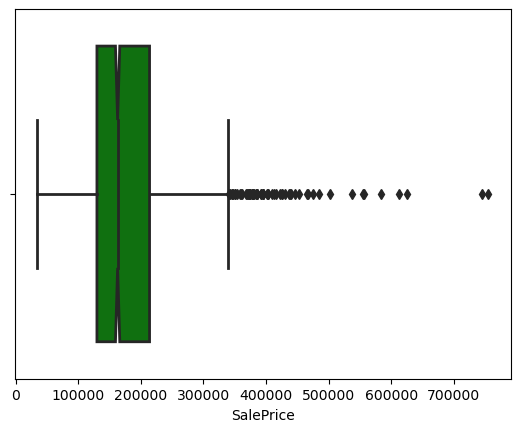

In [14]:
sns.boxplot(x="SalePrice", data=df, notch=True, linewidth=2, color='green')

#### Finding the relationships between missing values and the target (independent) variables

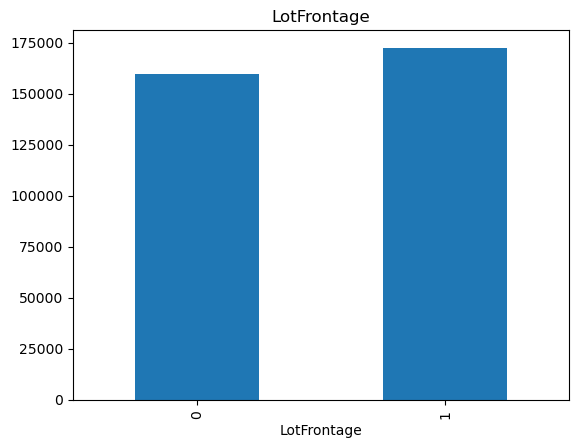

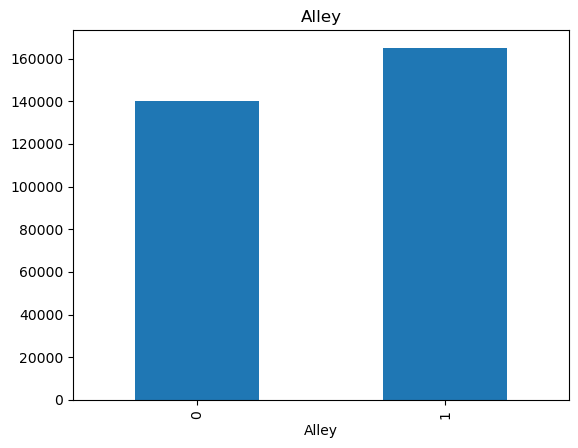

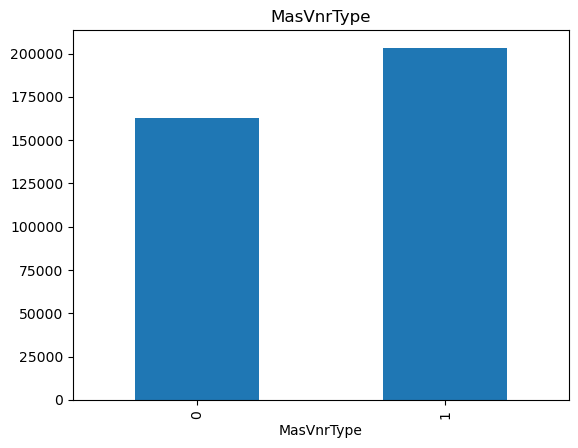

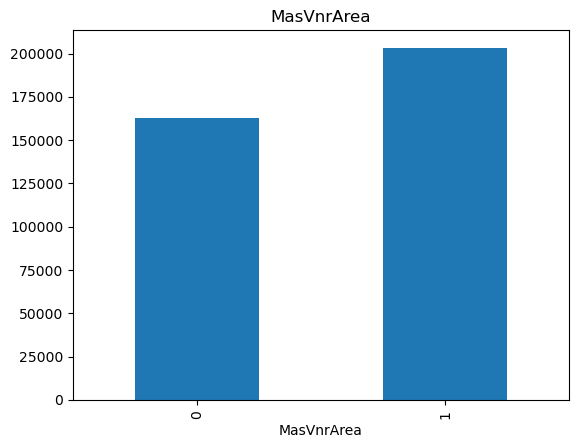

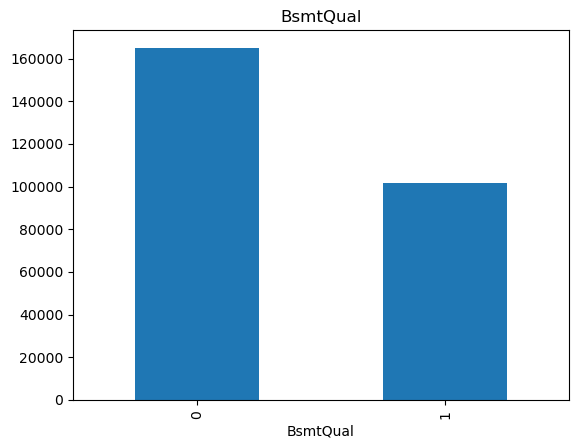

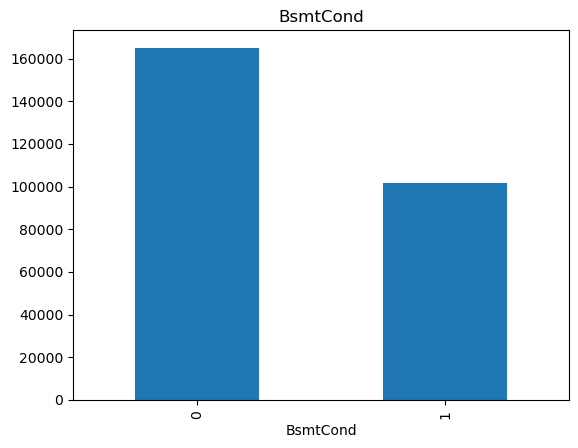

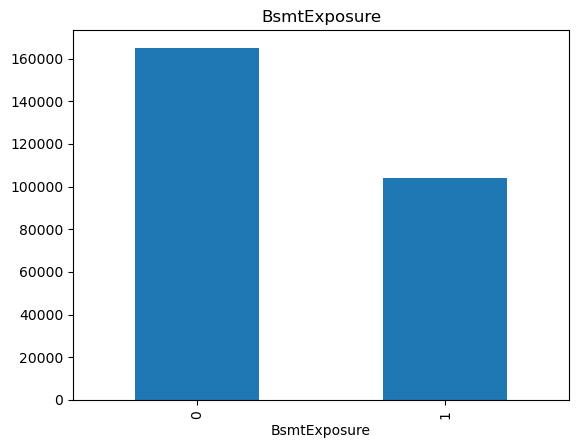

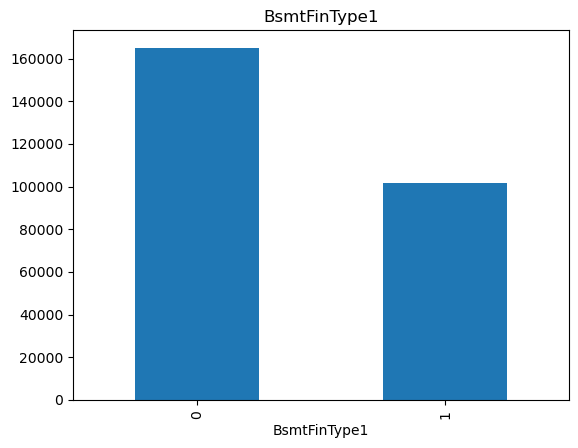

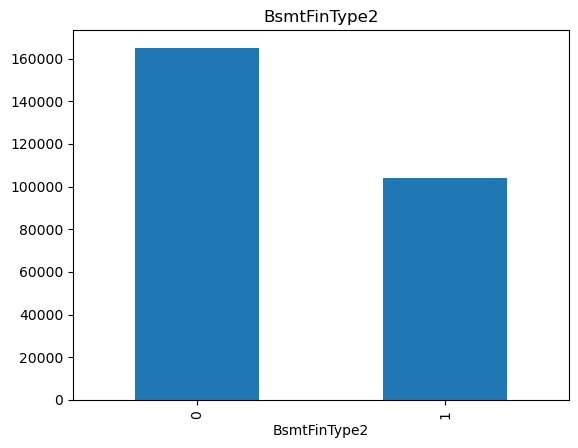

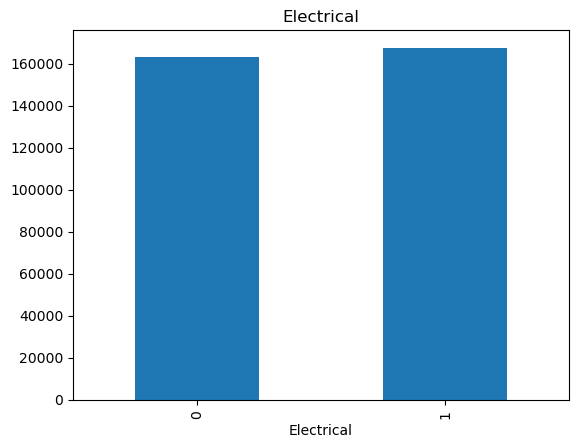

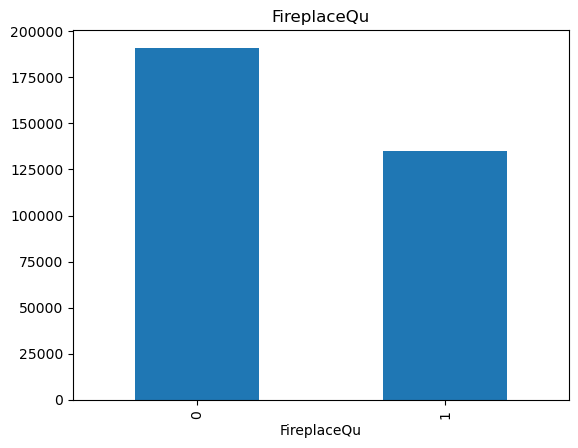

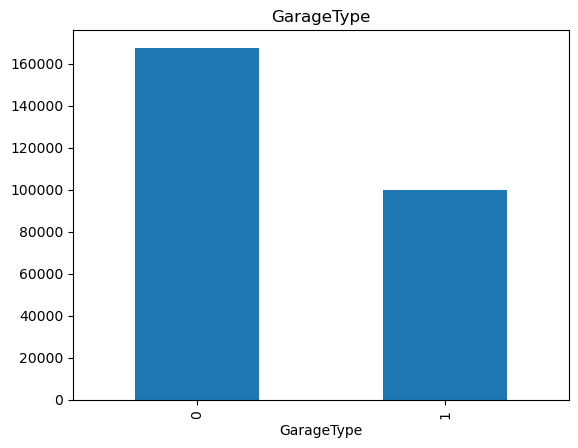

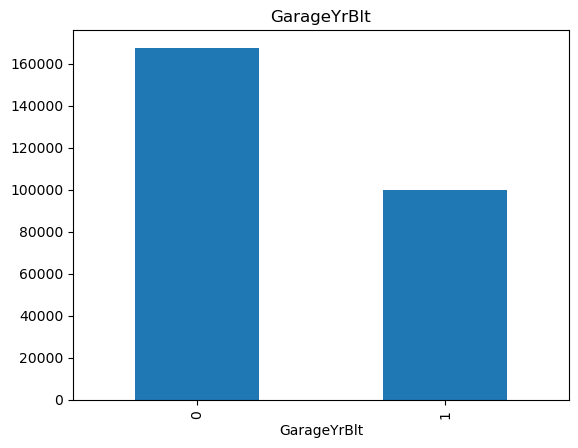

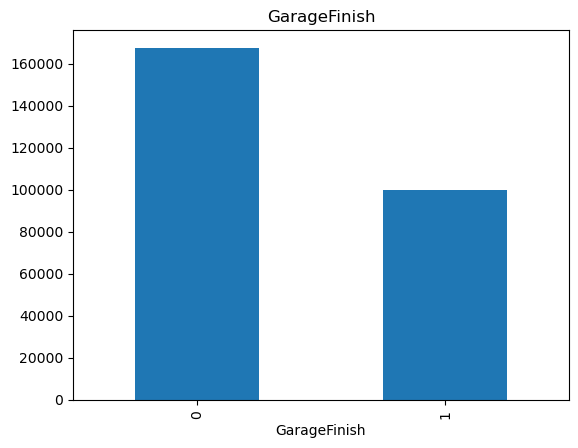

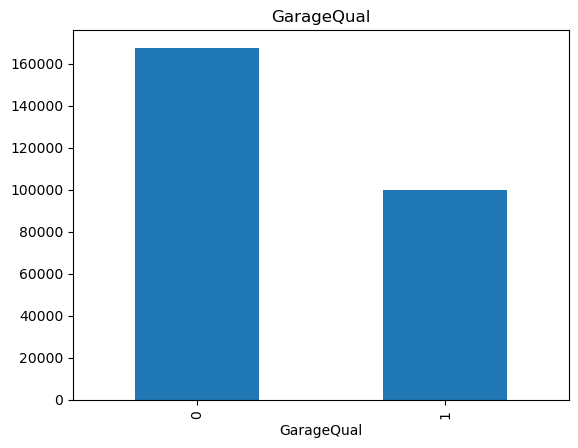

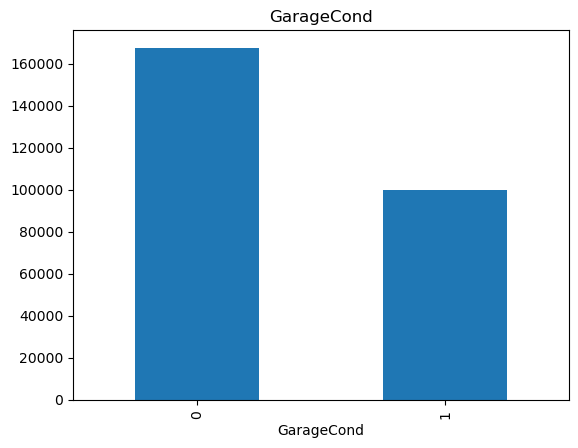

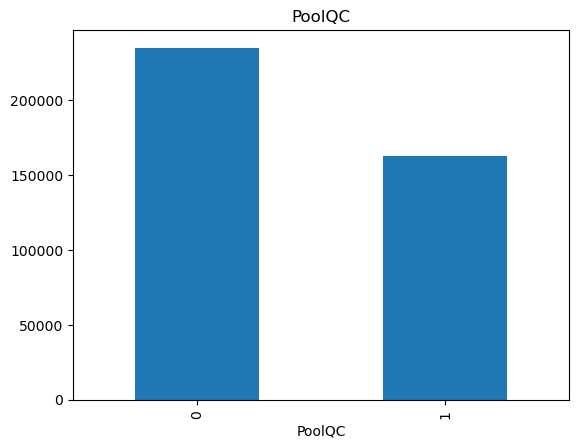

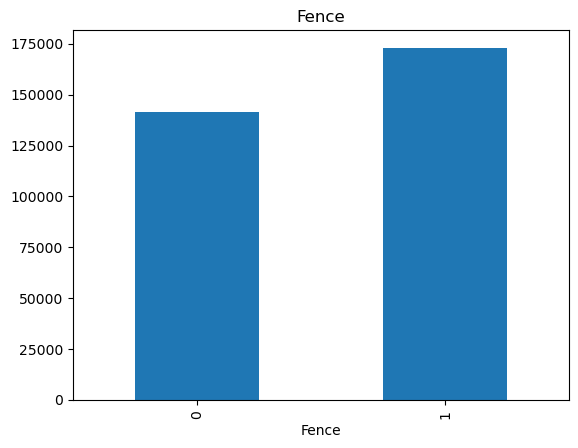

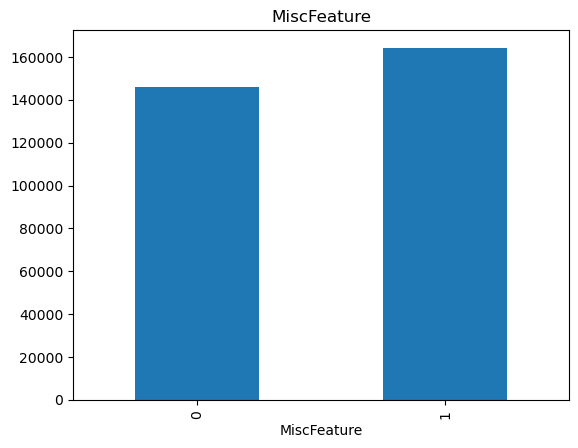

In [15]:
# Lets find the relationship between the missing values and the target variable

data = df.copy()
for feature in features_with_missing:
    # represent the features or values with missing component as 1 and 0
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    


# Feature Engineering

In [17]:
#Handle missing values

#first technique
data = df.copy()
features_with_new = [feature for feature in df.columns if df[feature].isnull().sum()>0]
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

#replacing categorical values 
def replace_categorical(dataset, categorical_features):
    dataset[categorical_features] = data[categorical_features].fillna('missing')
    return dataset

# replace_categorical(data, categorical_features)
    



In [18]:
# numerical_features

#2nd technique
def replace_cat(dataset,numerical_features):
    dataset[Numerical_data] = dataset[Numerical_data].fillna(dataset[Numerical_data].mode())
    return dataset

replace_cat(data, Numerical_data)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [19]:
#3rd technique
numerical_values = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtype!='O']
for feature in numerical_values:
    median_value = data[feature].median()
    
    #create a new feature to capture NaN values
    df[feature+'nan']= np.where(df[feature].isnull(),1,0)
    data[feature] = data[feature].fillna(median_value)
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

What is an outlier? An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

What are the criteria to identify an outlier?

Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation
What is the reason for an outlier to exists in a dataset?

Variability in the data
An experimental measurement error
What are the impacts of having outliers in a dataset?

It causes various problems during our statistical analysis
It may cause a significant impact on the mean and the standard deviation
Various ways of finding the outlier

Box plot
using z score OR
using the IQR interquantile range(we'd use this for now)

In [20]:
q3 = data['SalePrice'].quantile(0.75)
q1 = data['SalePrice'].quantile(0.25)

In [21]:
iqr = q3 -q1
iqr

84025.0

In [22]:
lower_bound = q1 - 1.5*iqr 
upper_bound = q3 + 1.5*iqr

In [23]:
lower_bound

3937.5

In [24]:
upper_bound

340037.5

In [26]:
outliers = data[(data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)]
outliers

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
112    113          60       RL         77.0     9965   Pave   NaN      Reg   
151    152          20       RL        107.0    13891   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1268  1269          50       RL         69.0    14100   Pave   NaN      IR1   
1353  1354          50       RL         56.0    14720   Pave   NaN      IR1   
1373  1374          20       RL         69.0    11400   Pave   NaN      Reg   
1388  1389          20       RL         42.0    14892   Pave   NaN      IR1   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
11           Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
58           HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   
112          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
151          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
...          ...       ...       ...       ...          ...        ...   
1268         Lvl    AllPub    Inside       Mod      Crawfor       Norm   
1353         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
1373         Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1388         HLS    AllPub   CulDSac       Gtl      Gilbert       Norm   
1437         Lvl    AllPub       FR2       Gtl      NridgHt       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
11         Norm     1Fam     2Story            9            5       2005   
53         Norm     1Fam     1Story            9            5       1981   
58         Norm     1Fam     2Story           10            5       2006   
112        Norm     1Fam     2Story            7            5       2007   
151        Norm     1Fam     1Story            8            5       2007   
...         ...      ...        ...          ...          ...        ...   
1268       Norm     1Fam     1.5Fin            8            9       1935   
1353       Norm     1Fam     1.5Fin            8            5       1995   
1373       Norm     1Fam     1Story           10            5       2001   
1388       Norm     1Fam     1Story            9            5       2006   
1437       Norm     1Fam     1Story            8            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
11            2006       Hip  CompShg     WdShing     Wd Shng      Stone   
53            1987     Gable  WdShngl     WdShing     Wd Shng       None   
58            2006       Hip  CompShg     VinylSd     VinylSd    BrkFace   
112           2007     Gable  CompShg     VinylSd     VinylSd      Stone   
151           2008       Hip  CompShg     VinylSd     VinylSd      Stone   
...            ...       ...      ...         ...         ...        ...   
1268          1997     Gable  CompShg      Stucco      Stucco    BrkFace   
1353          1996       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1373          2002       Hip  CompShg     VinylSd     VinylSd    BrkFace   
1388          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
1437          2008       Hip  CompShg     VinylSd     VinylSd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
11         286.0        Ex        TA      PConc       Ex       TA   
53           0.0        Gd        TA     CBlock       Ex       TA   
58        1031.0        Ex        TA      PConc       Ex       TA   
112        220.0        Gd        TA      PConc       Ex       TA   

In [27]:
# Remove the outlier from the dataset
df = df[df["SalePrice"] <= upper_bound]

# Print the updated dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Text(0, 0.5, 'Years')

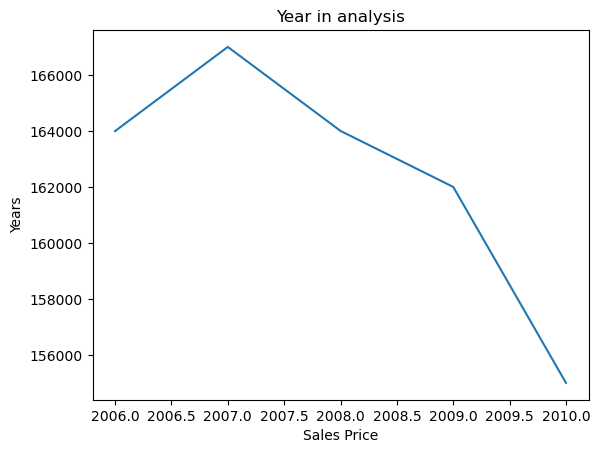

In [28]:
year_sold = data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Year in analysis')
plt.xlabel('Sales Price')
plt.ylabel('Years')

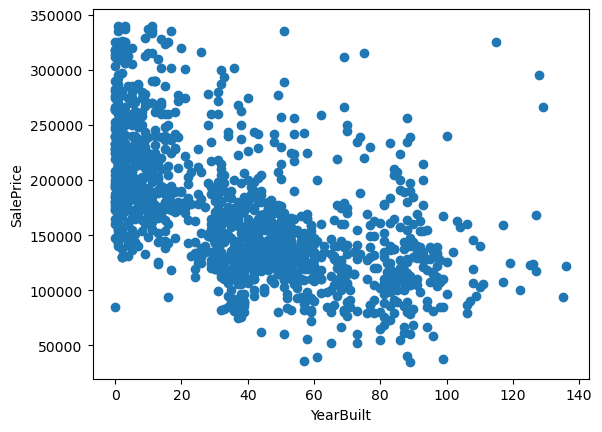

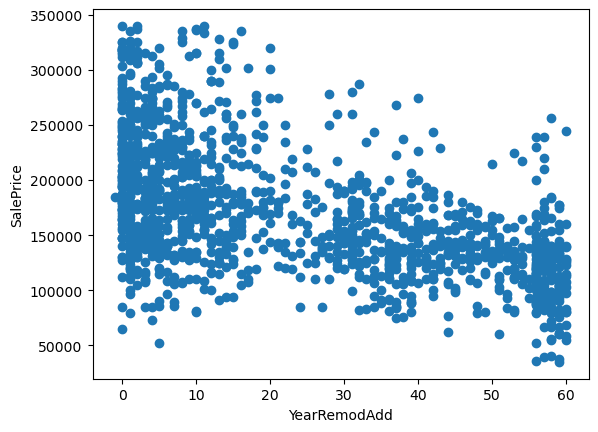

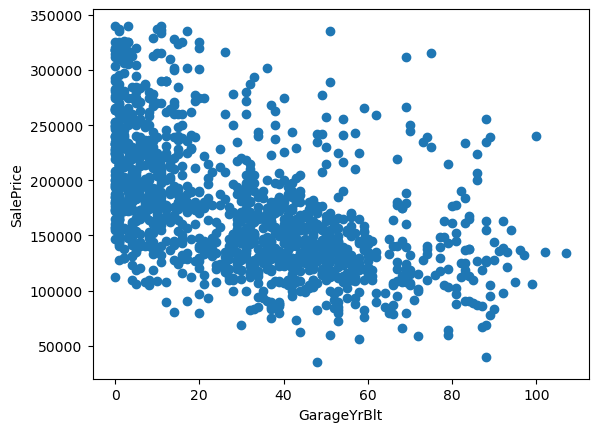

In [29]:
### Here we will compare the difference between all years features with Salesprice
data=df.copy()
temporal_data
for feature in temporal_data:
    if feature!='YrSold':
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        
       

In [30]:
### numerical variables- 2 Types
##1. Continuous variable and Discrete variable

discrete_feature=[feature for feature in Numerical_data if len(data[feature].unique())<=25]
print(len(discrete_feature))

18


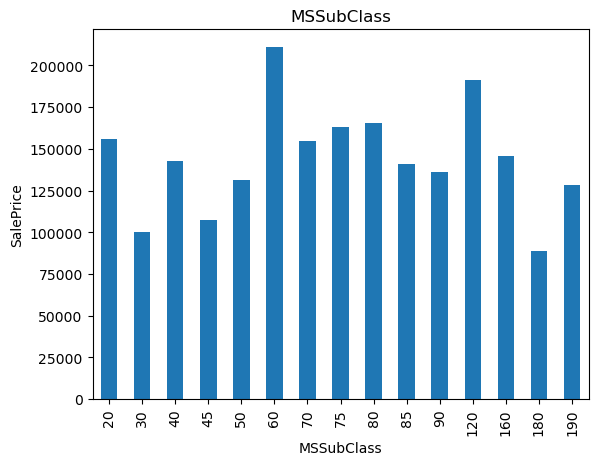

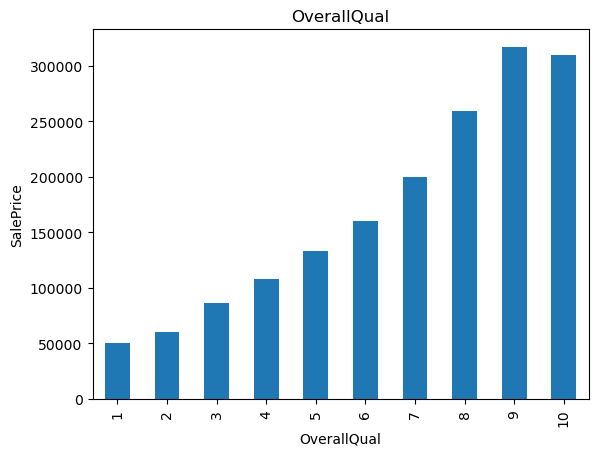

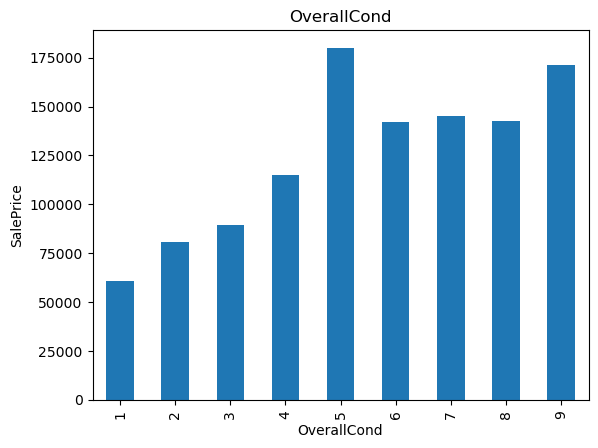

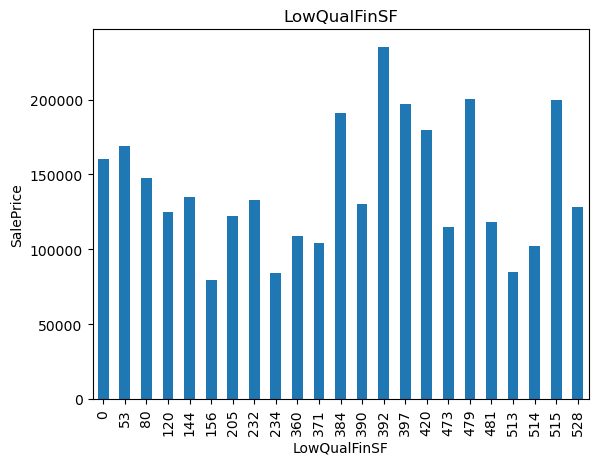

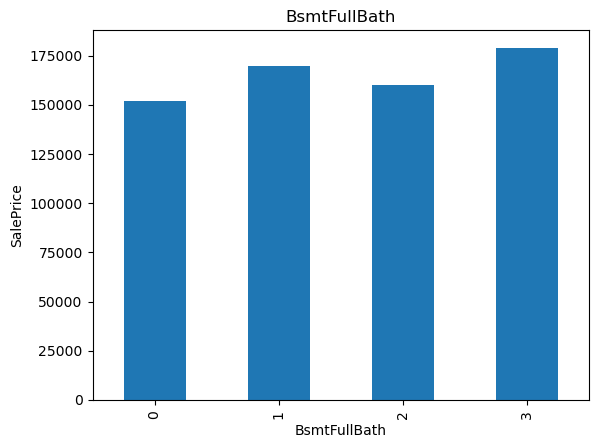

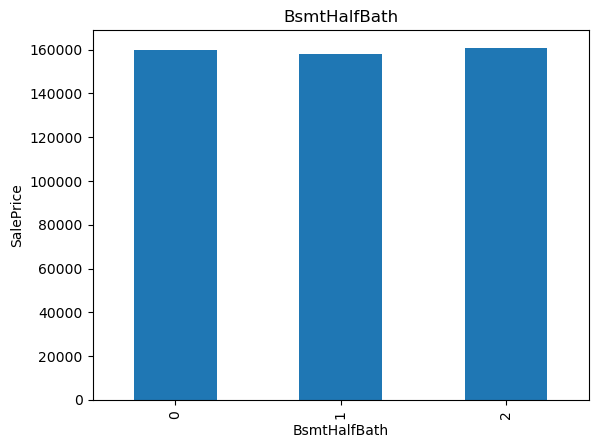

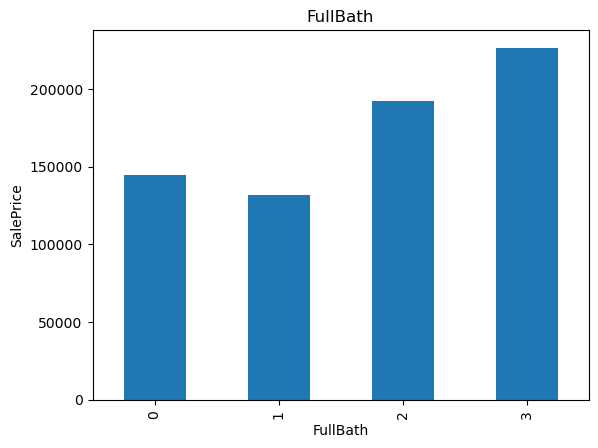

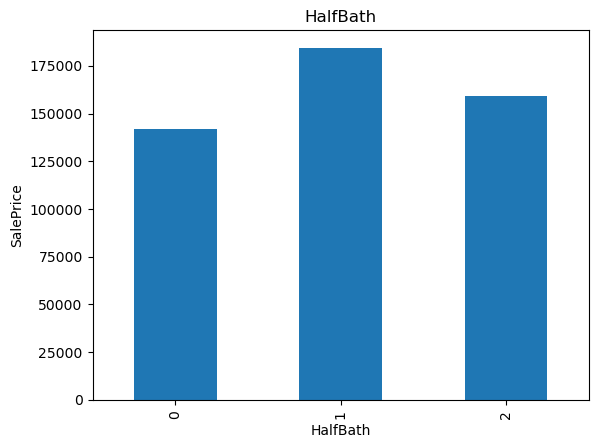

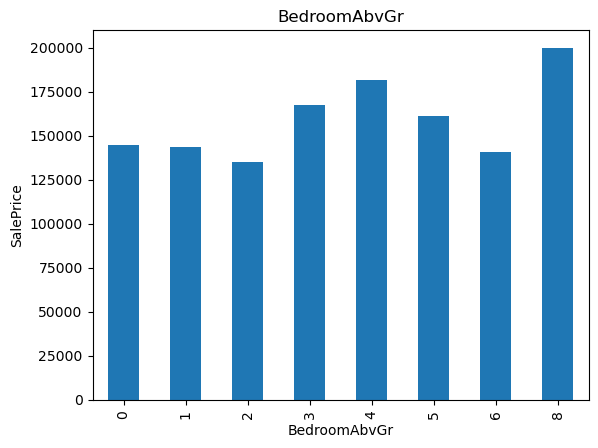

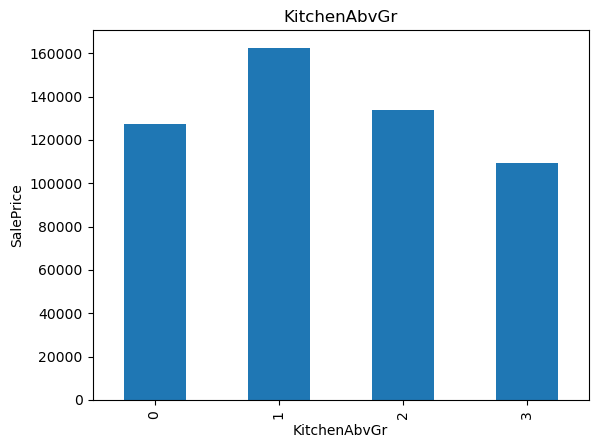

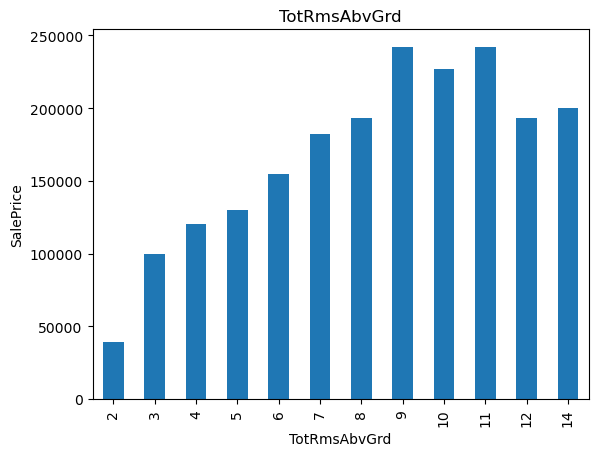

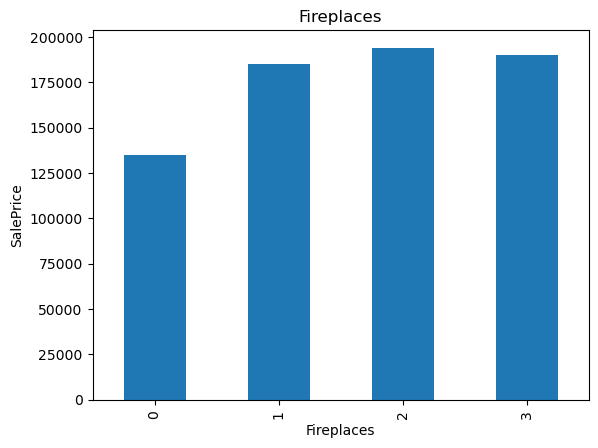

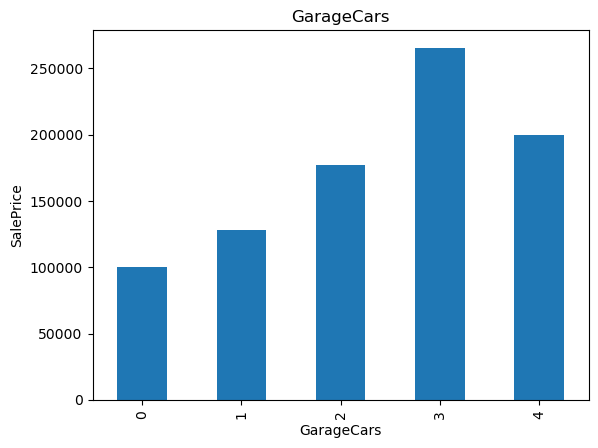

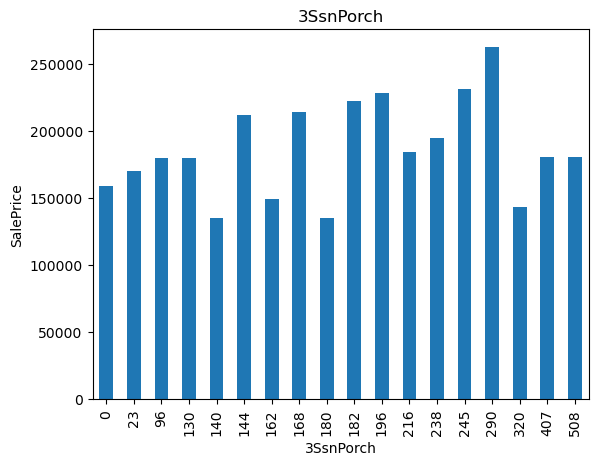

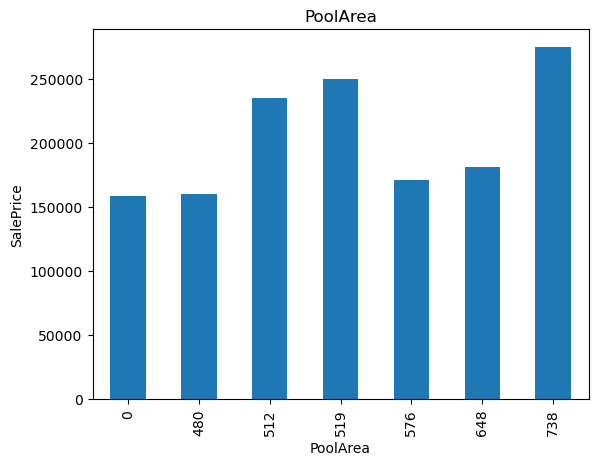

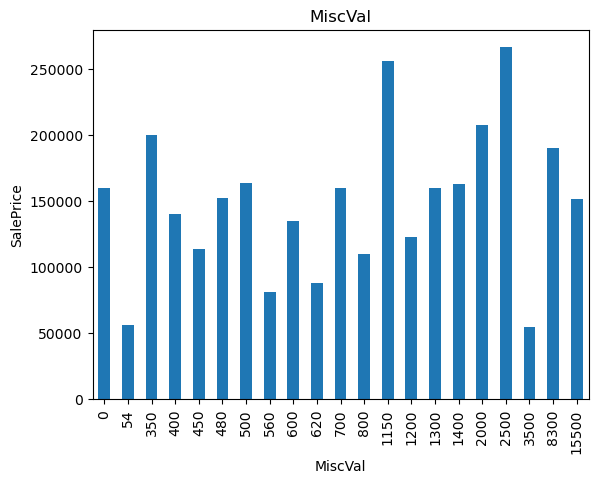

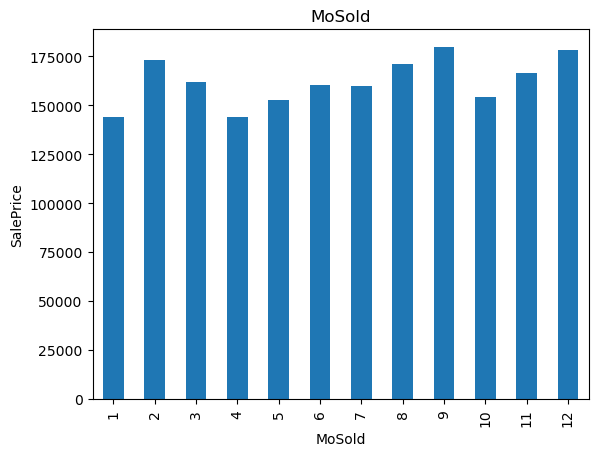

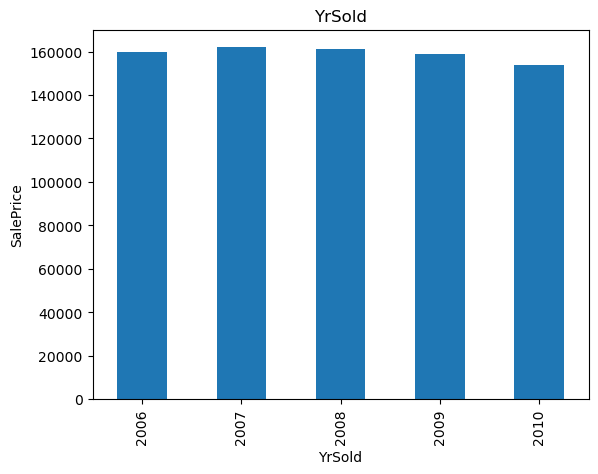

In [31]:
## Lets find the relationship between Discrete and Sales Price
data=df.copy()
for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [32]:
## Continuous Variable
continuous_feature=[feature for feature in Numerical_data if feature not in discrete_feature+temporal_data]
print(len(continuous_feature))

17


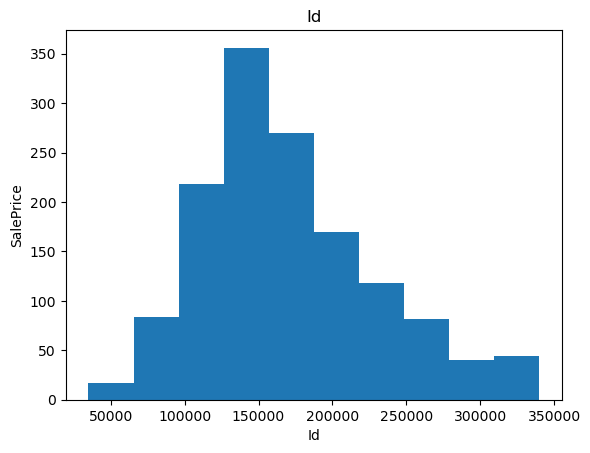

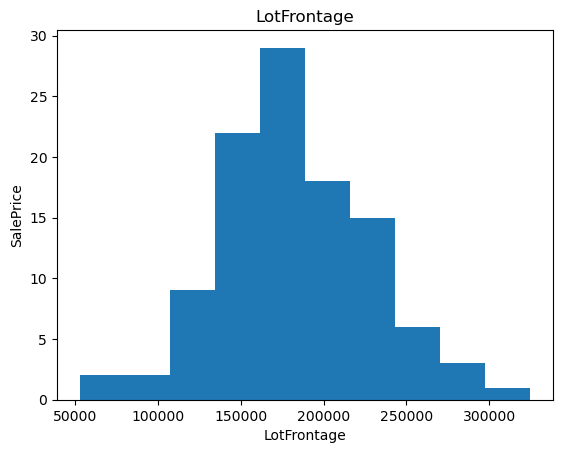

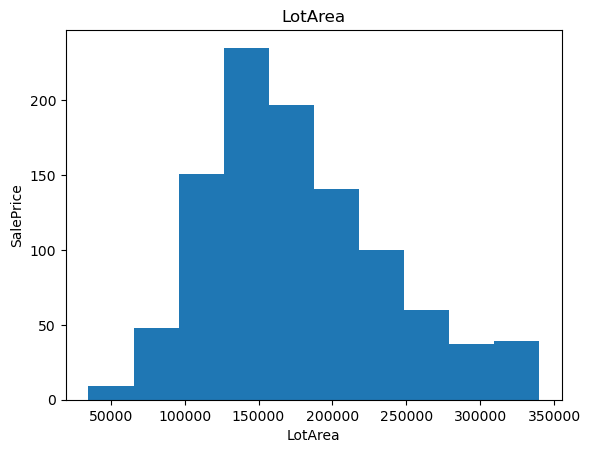

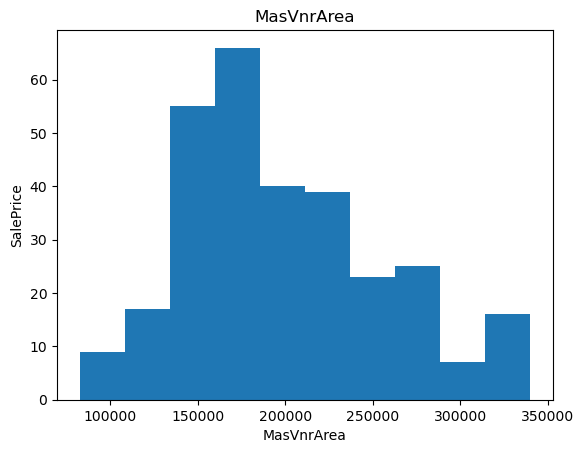

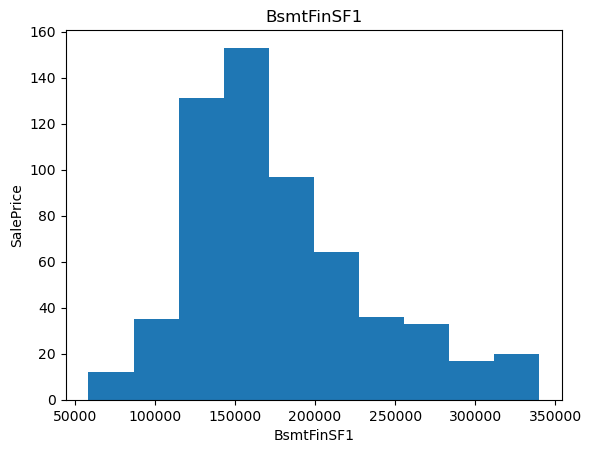

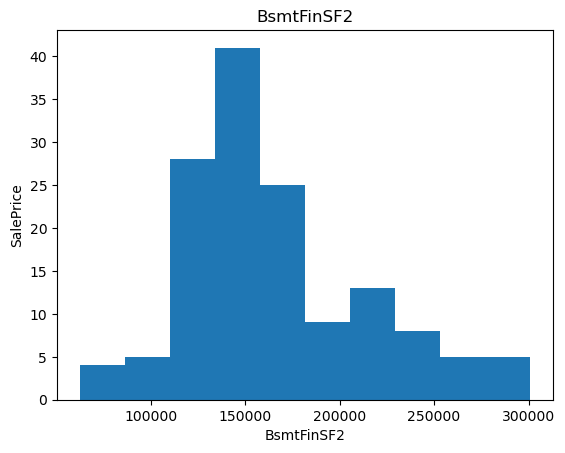

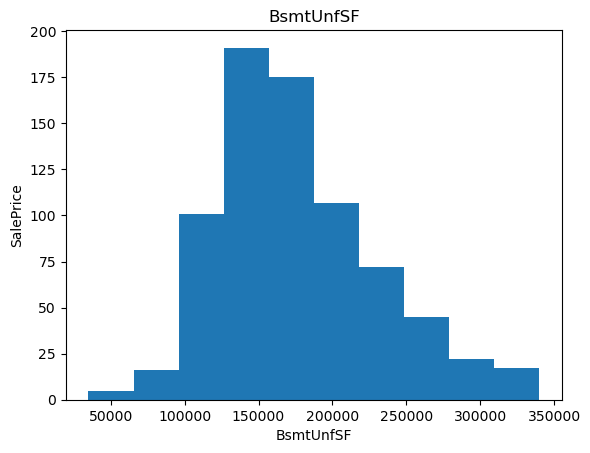

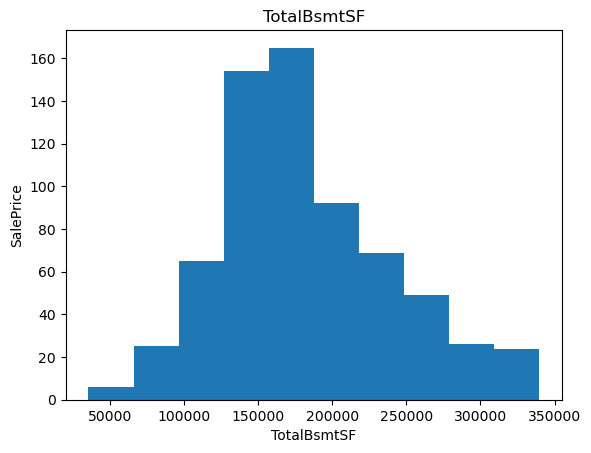

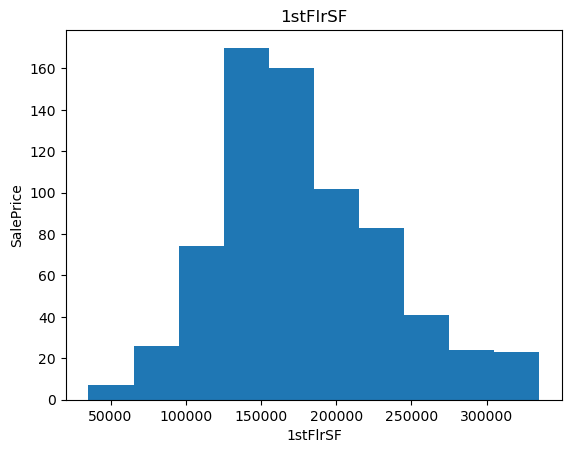

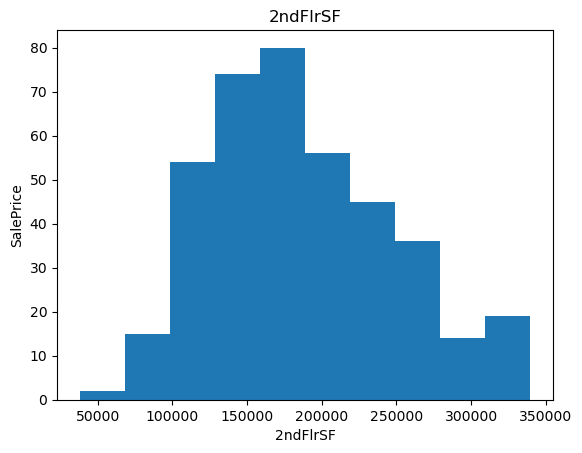

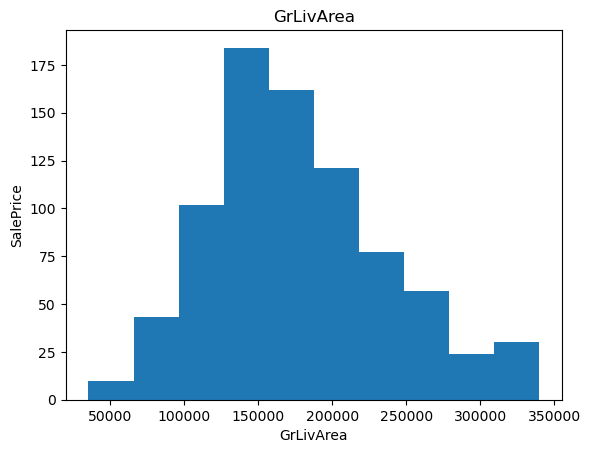

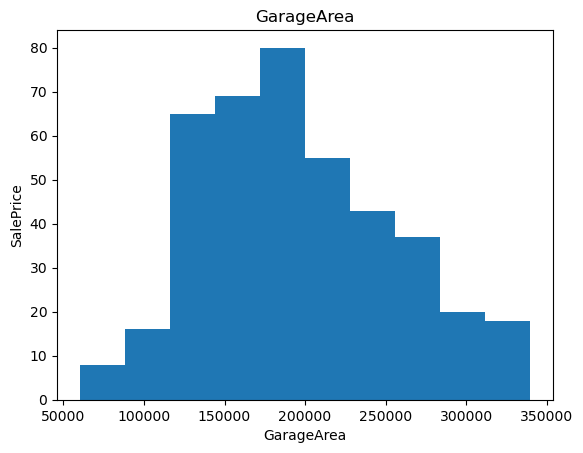

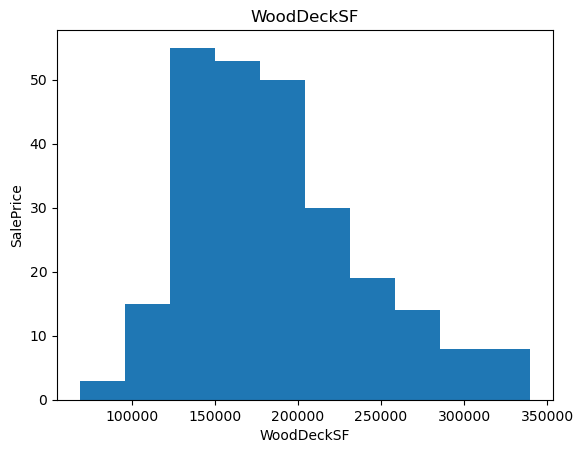

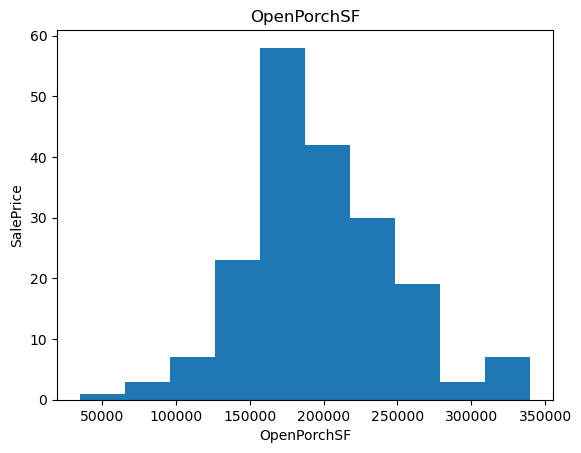

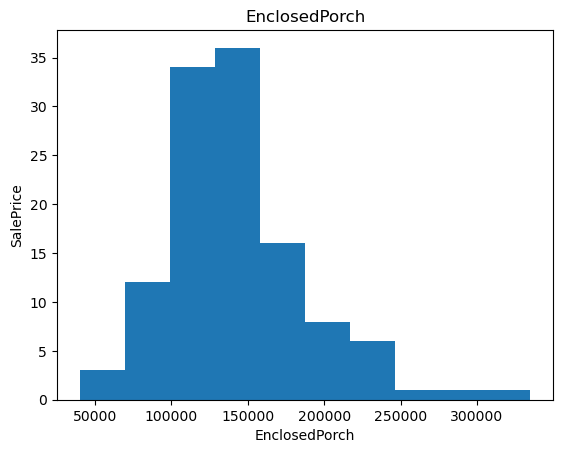

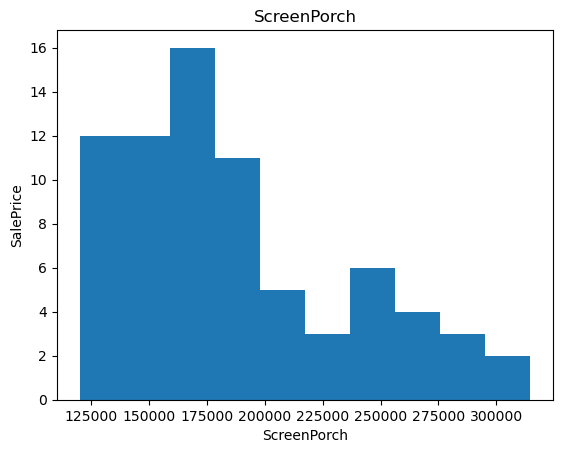

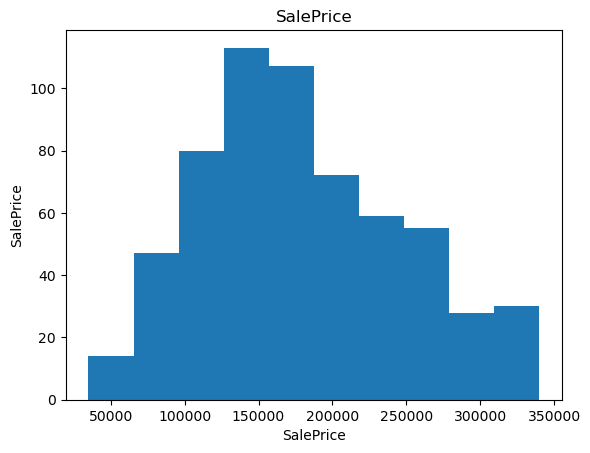

In [33]:
data = df.copy()
for feature in continuous_feature:
    data.groupby(feature)['SalePrice'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

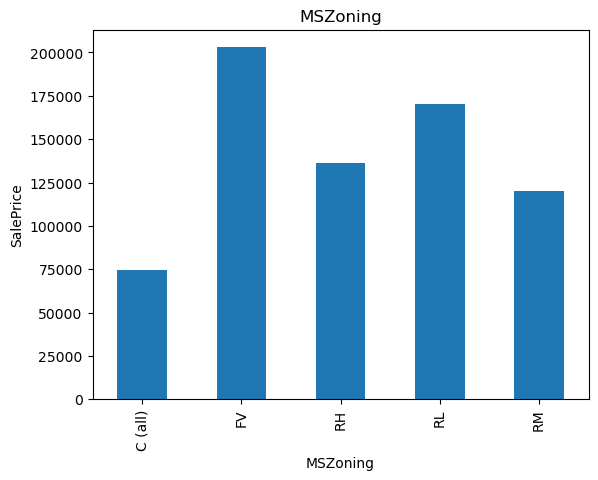

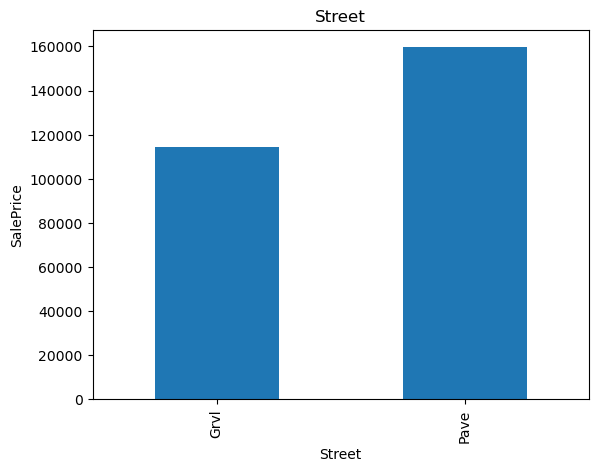

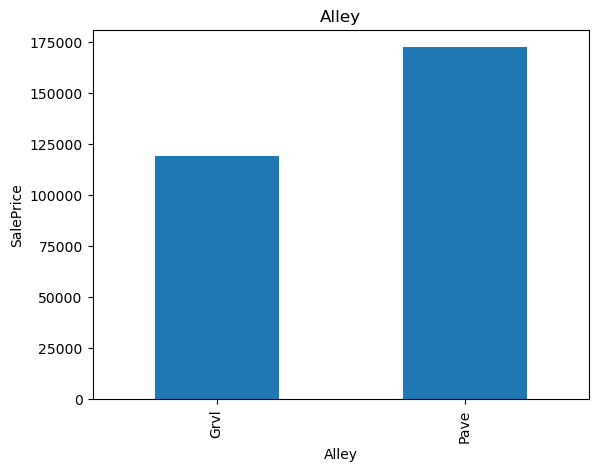

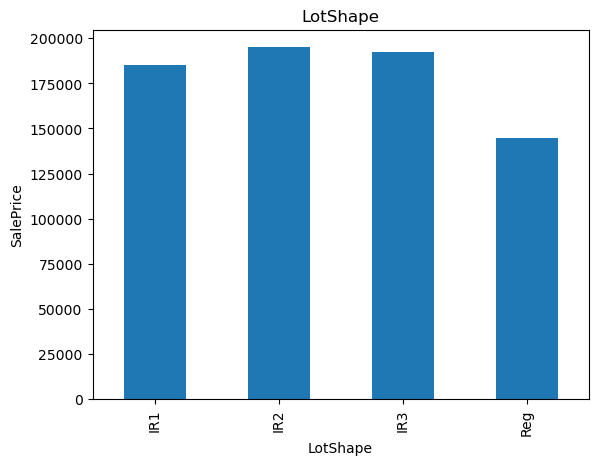

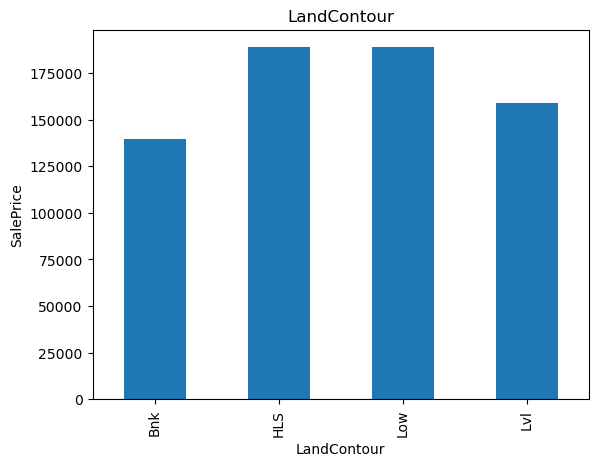

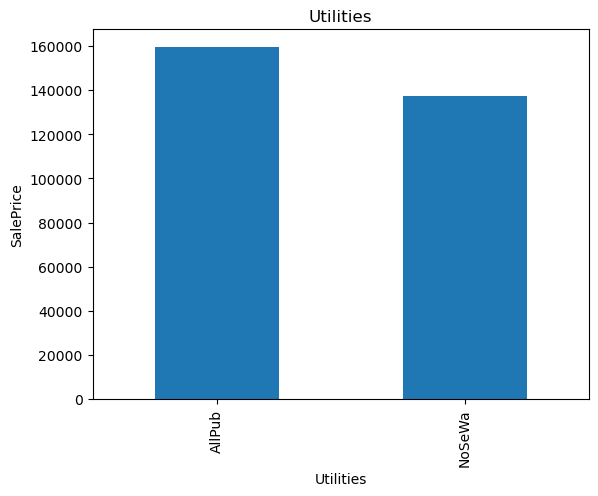

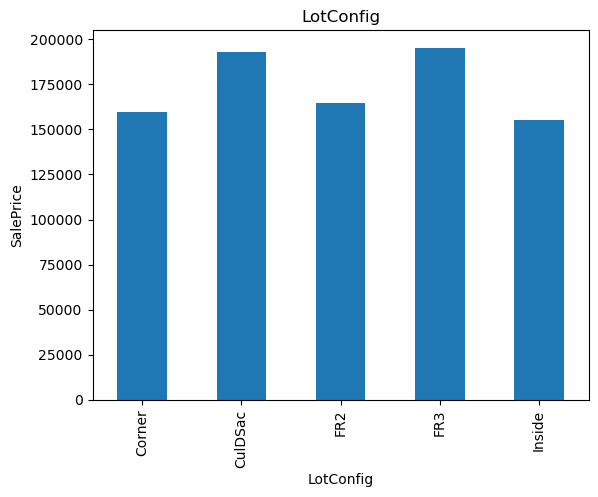

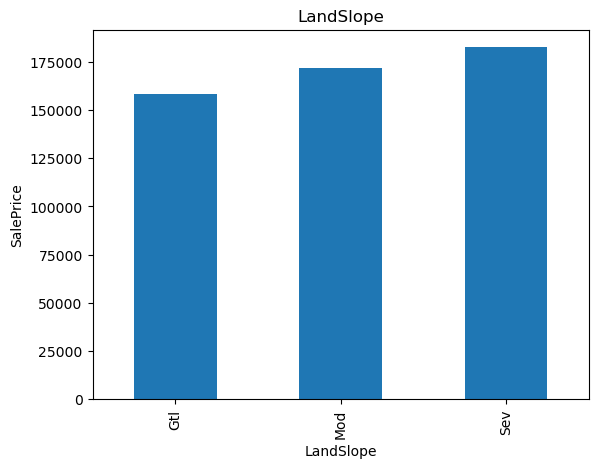

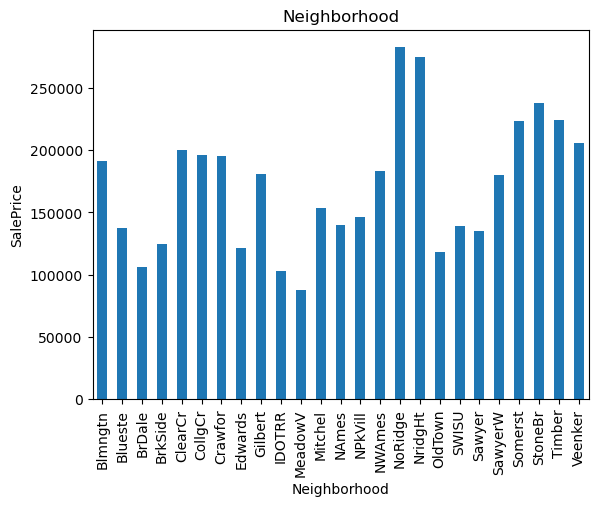

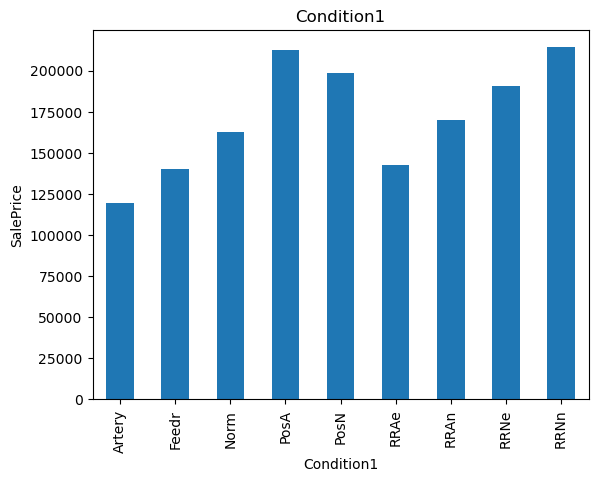

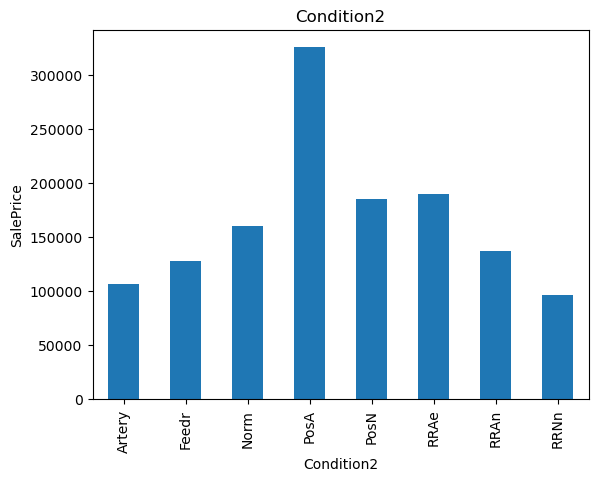

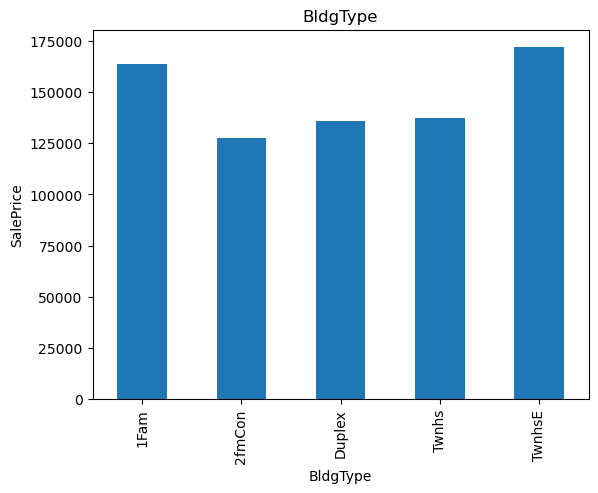

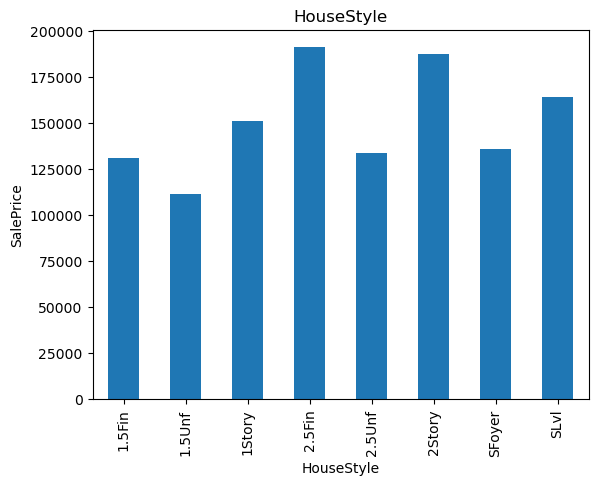

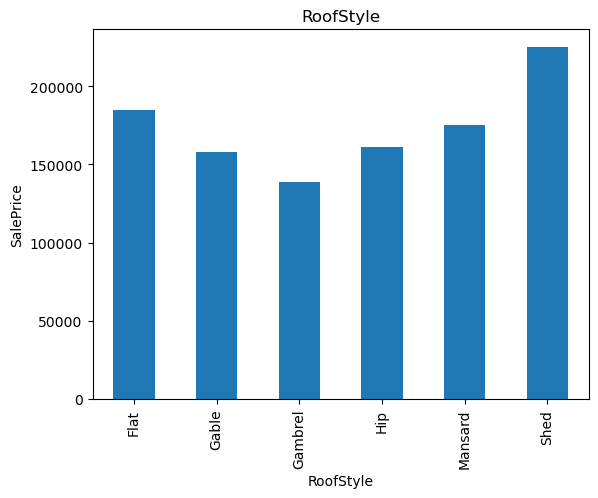

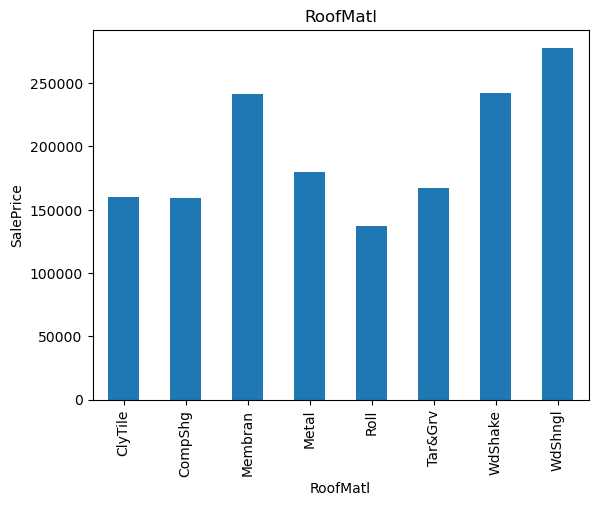

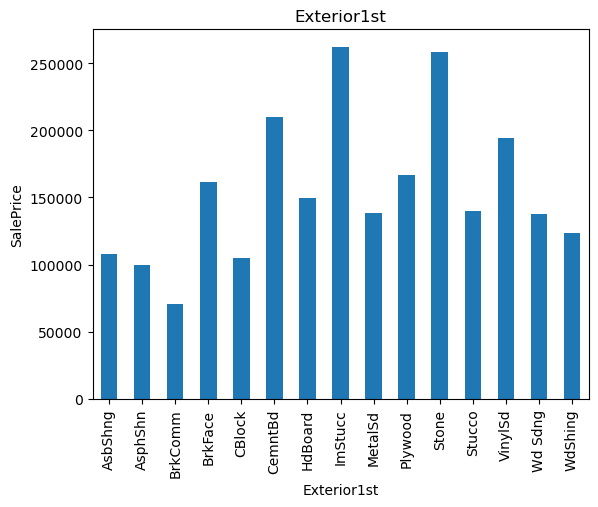

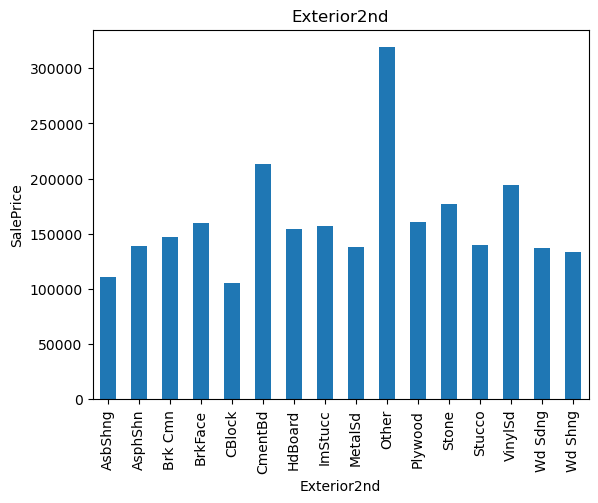

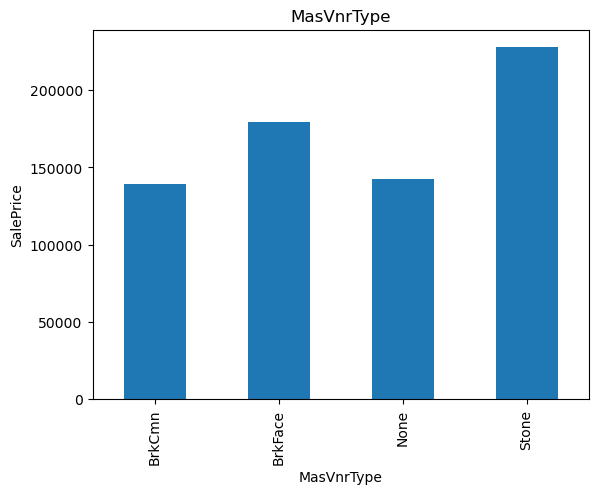

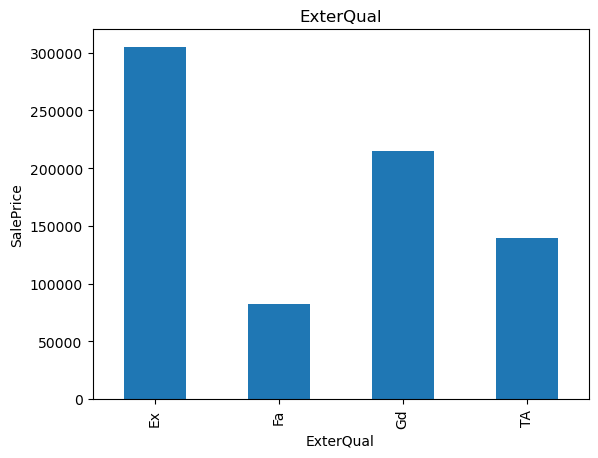

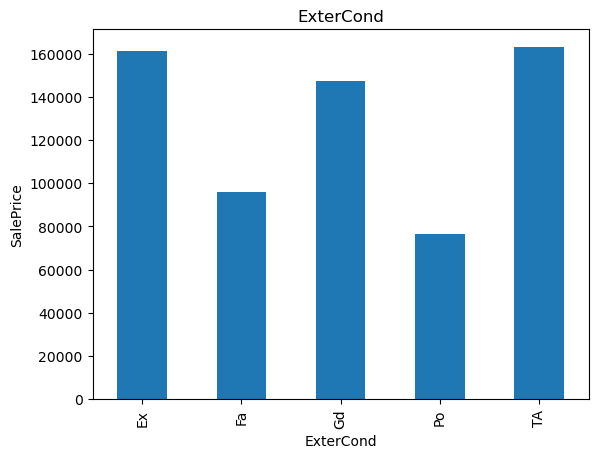

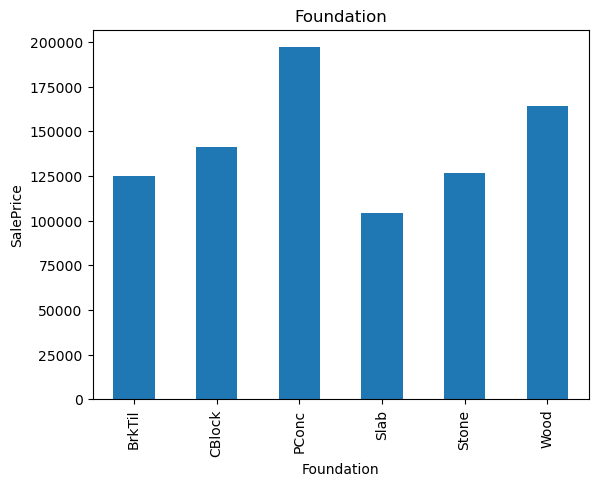

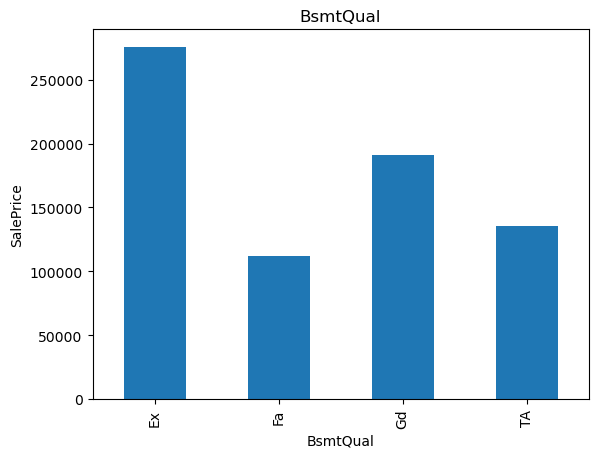

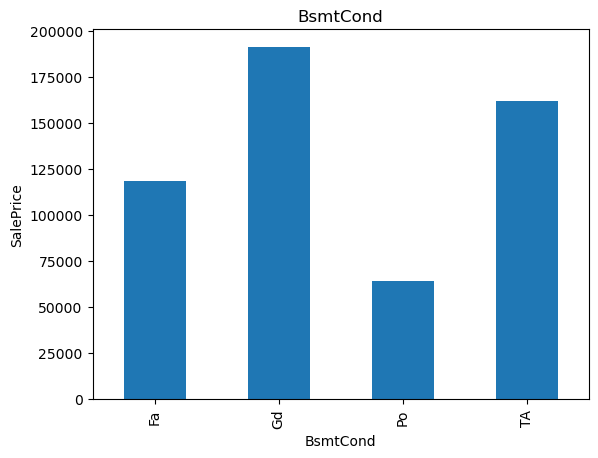

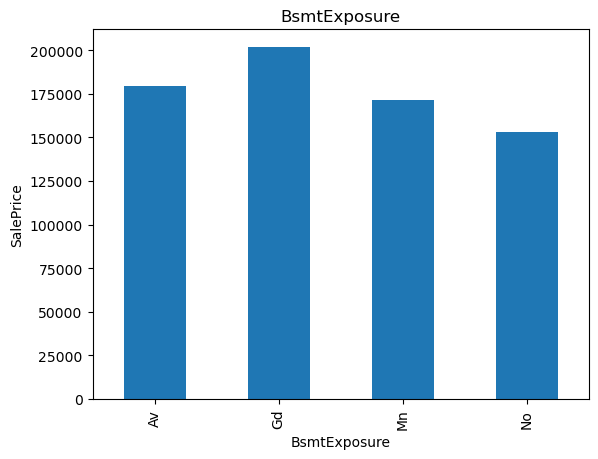

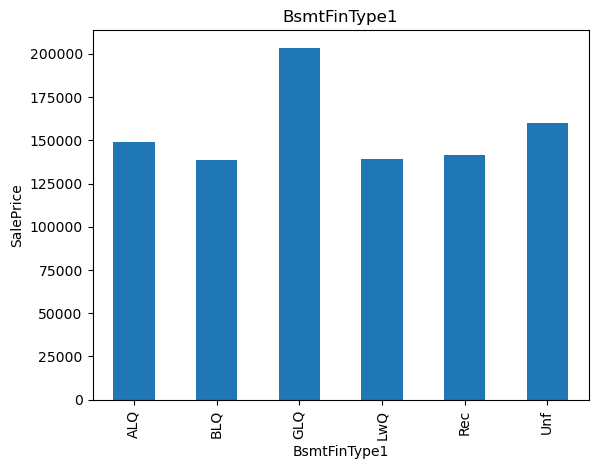

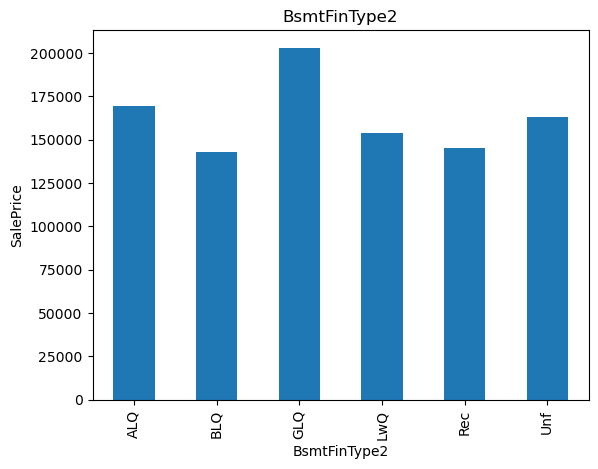

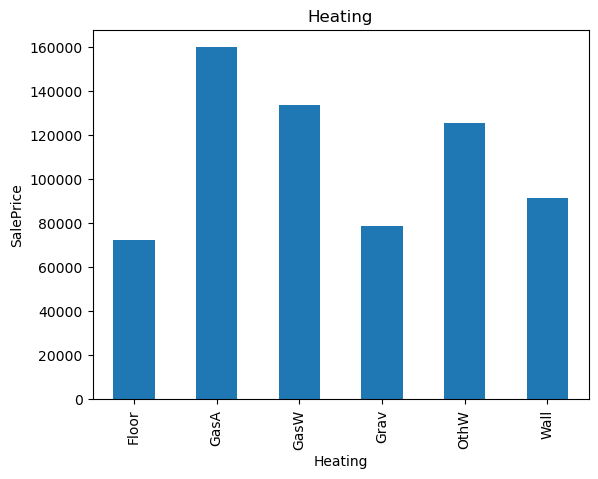

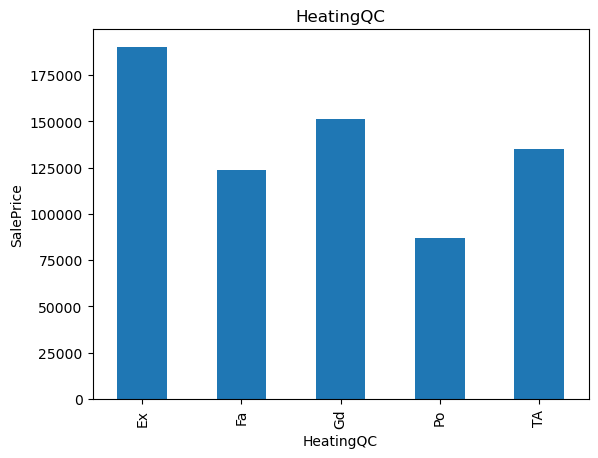

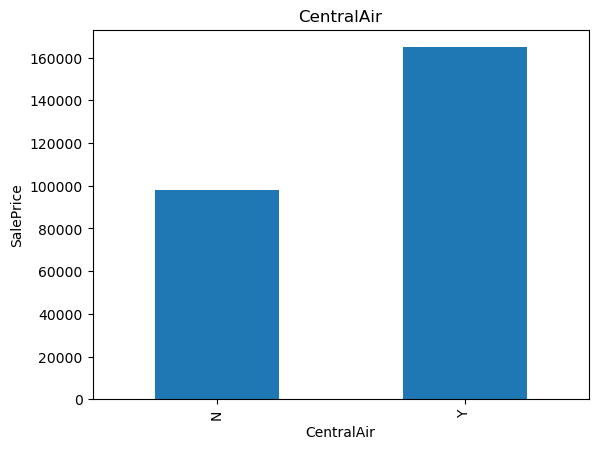

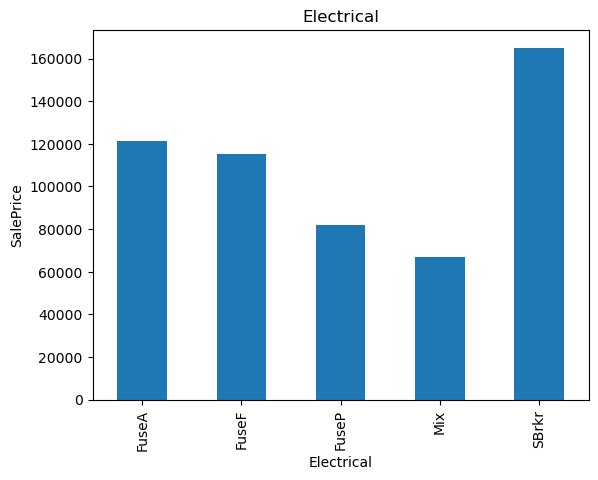

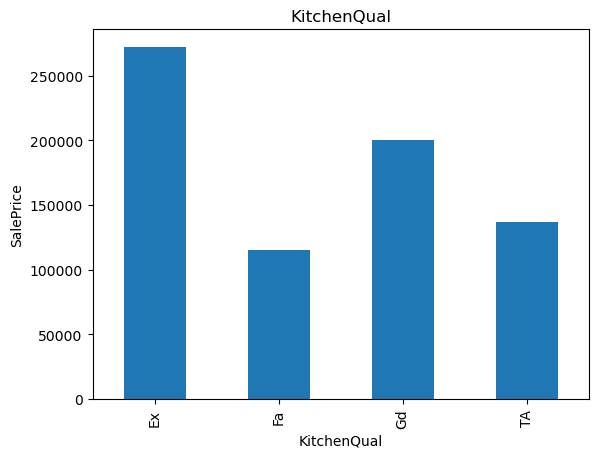

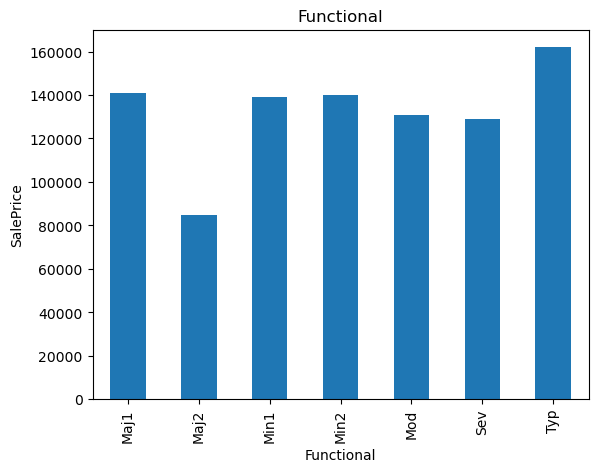

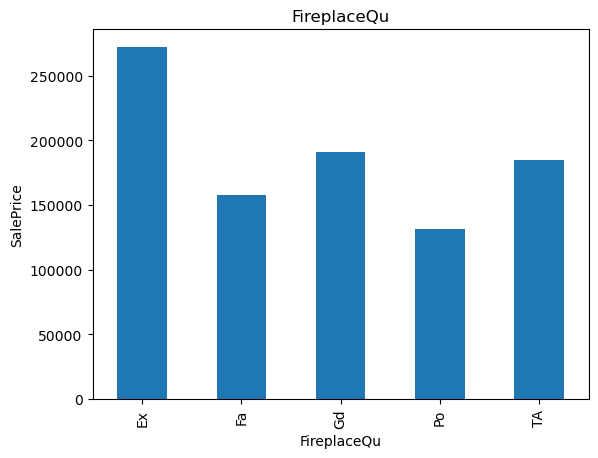

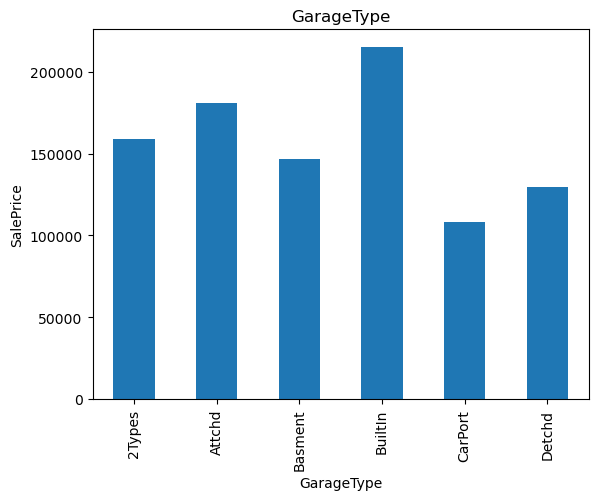

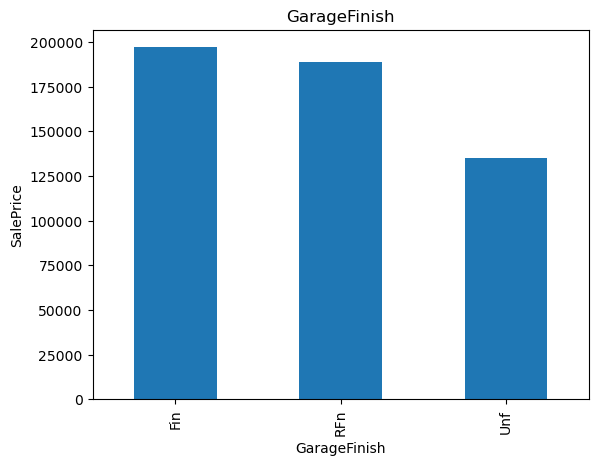

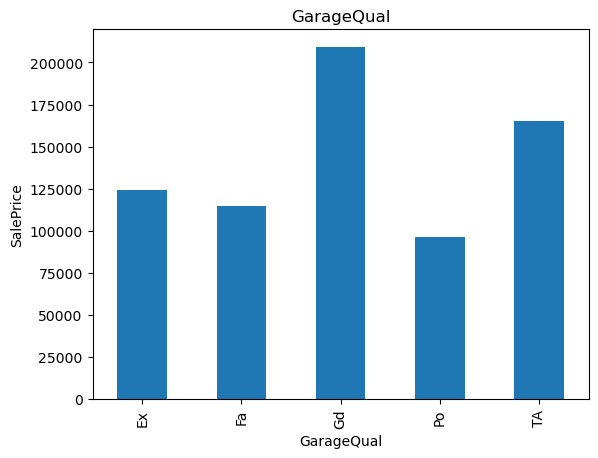

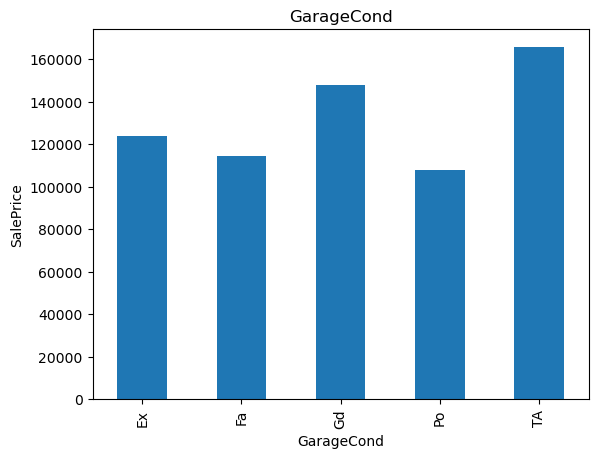

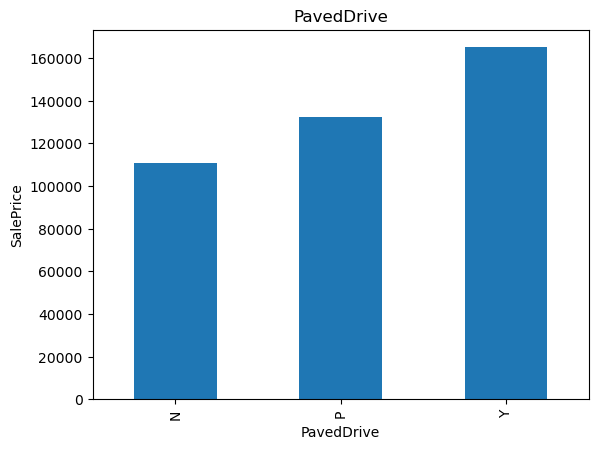

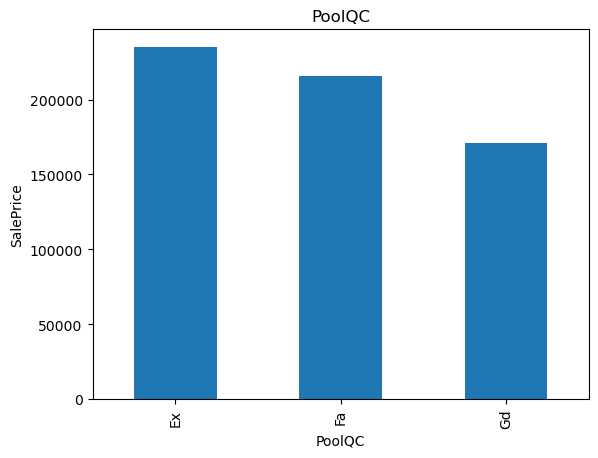

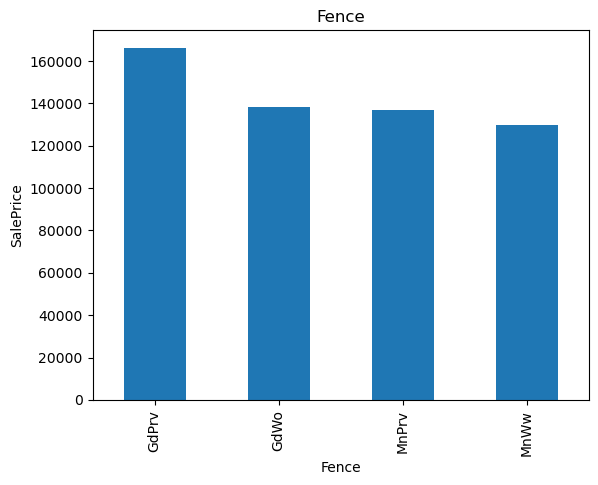

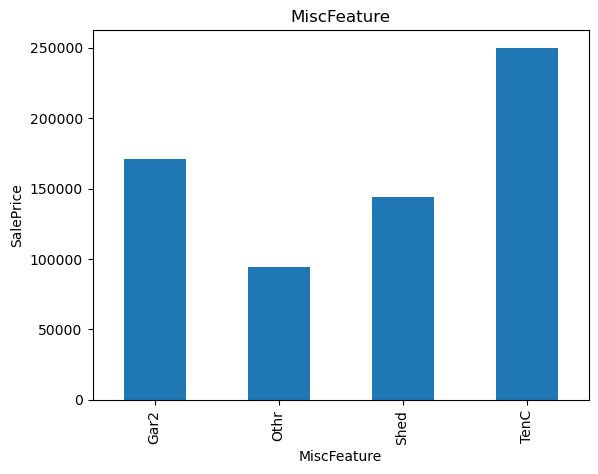

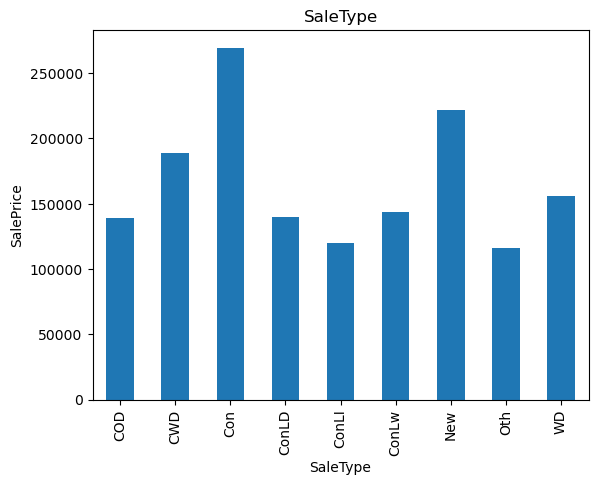

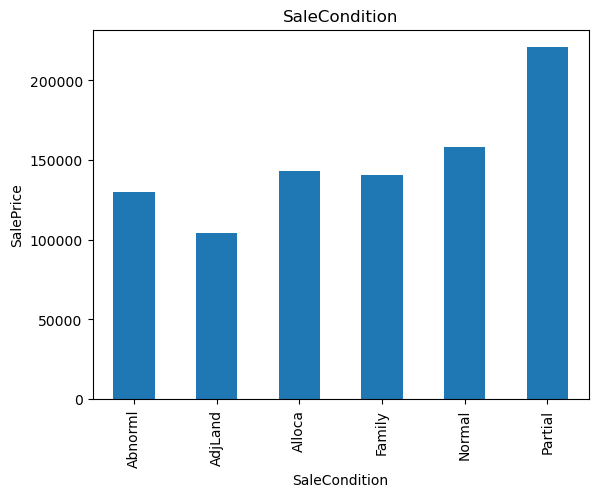

In [34]:
## find the relationship between categorical feature and Salesprice
data=df.copy()
for feature in categorical_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

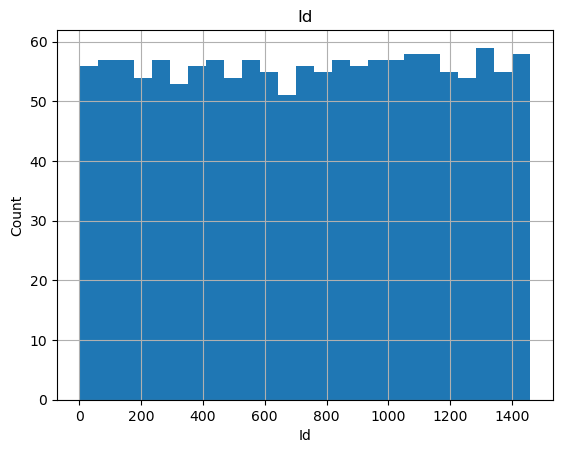

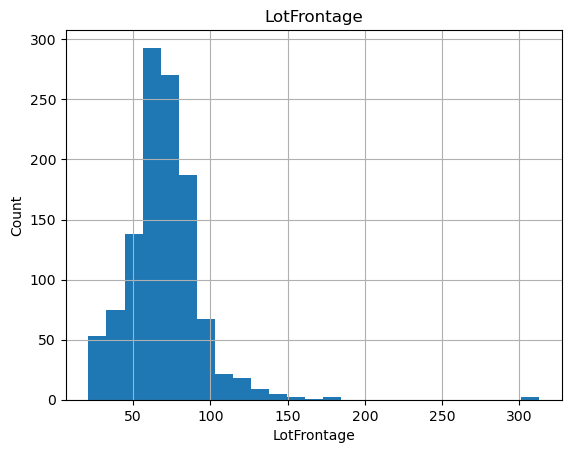

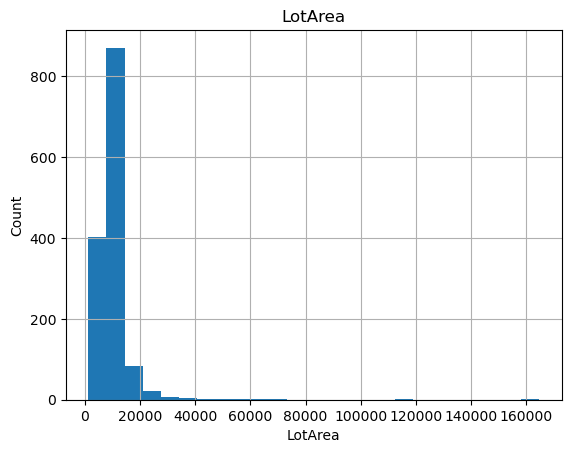

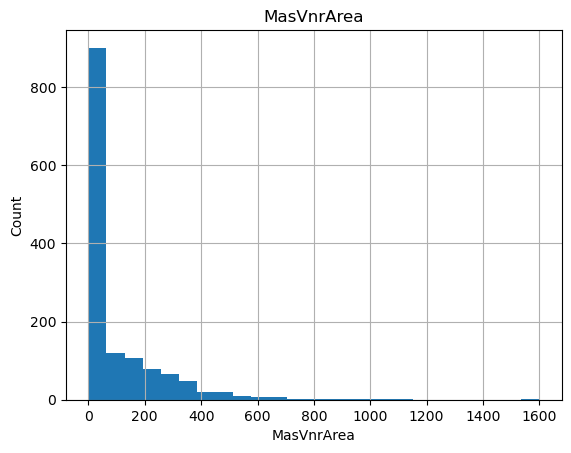

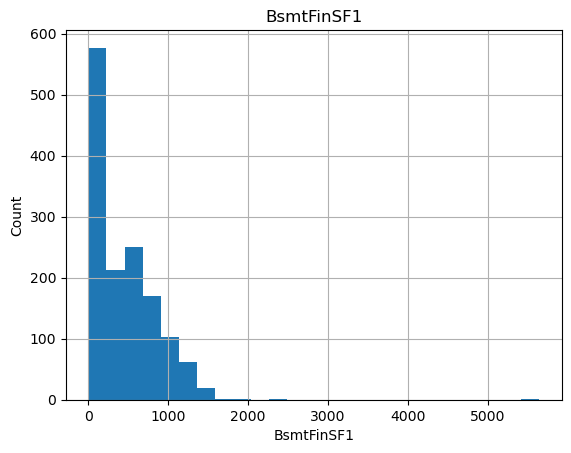

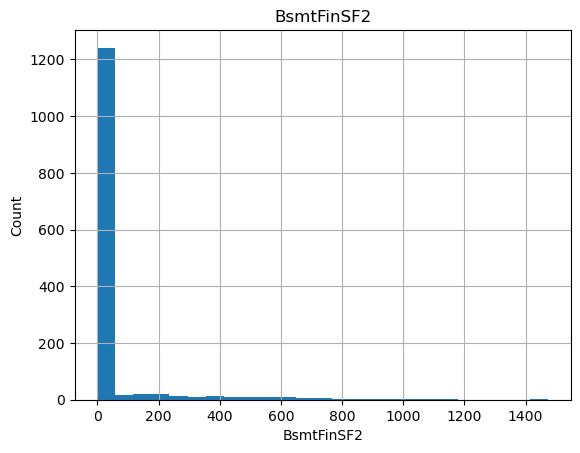

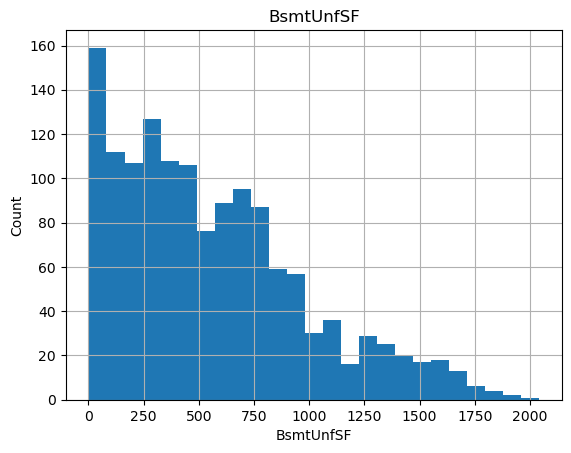

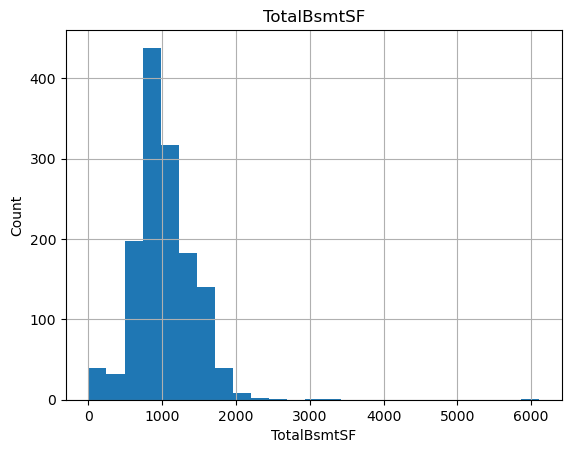

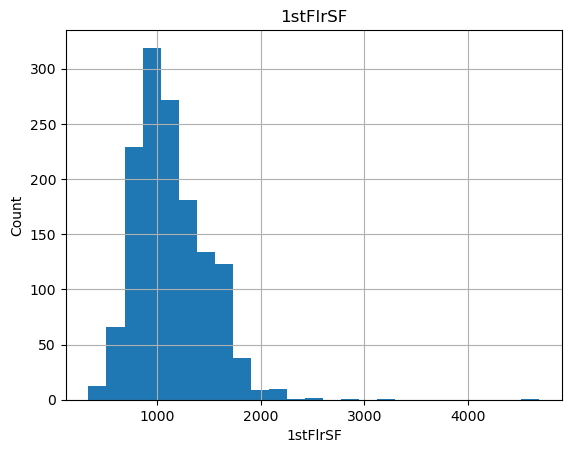

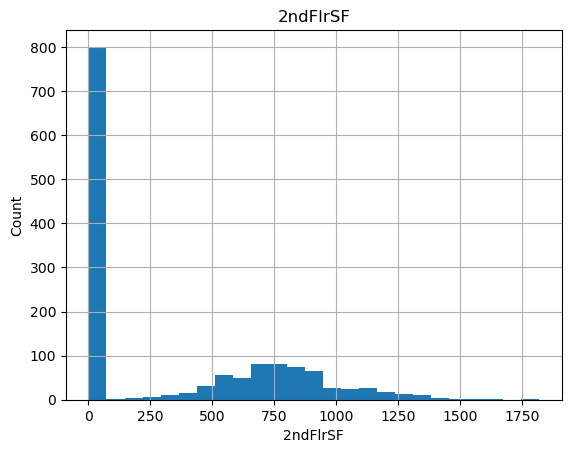

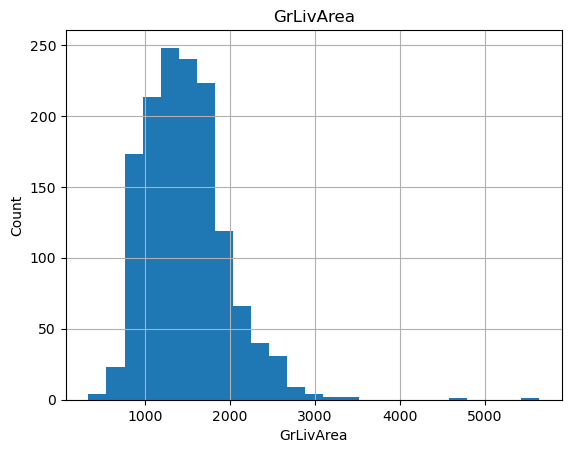

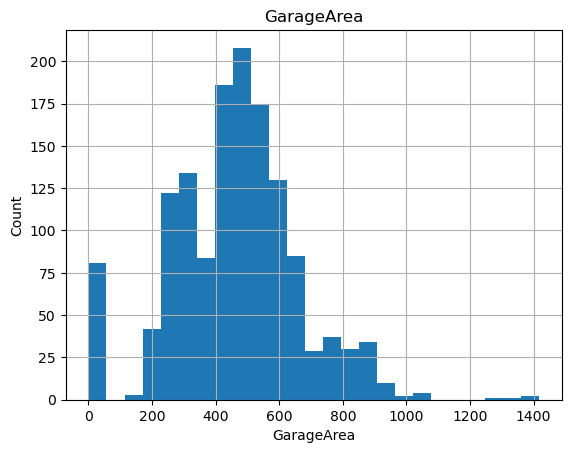

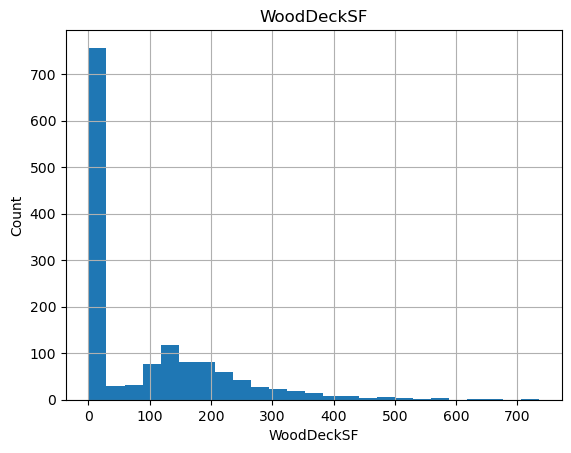

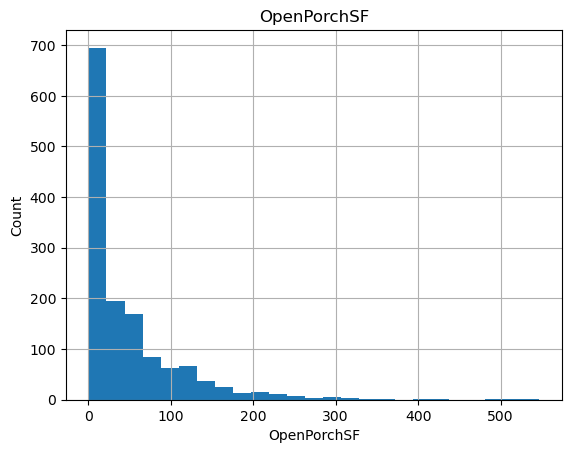

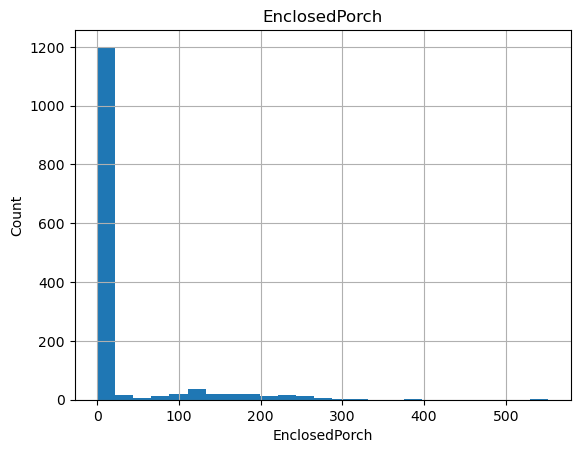

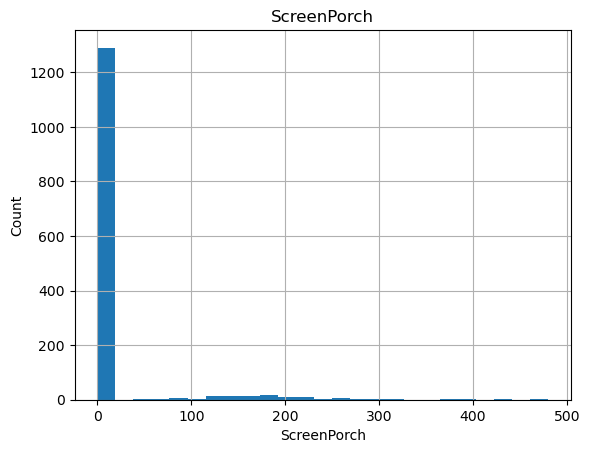

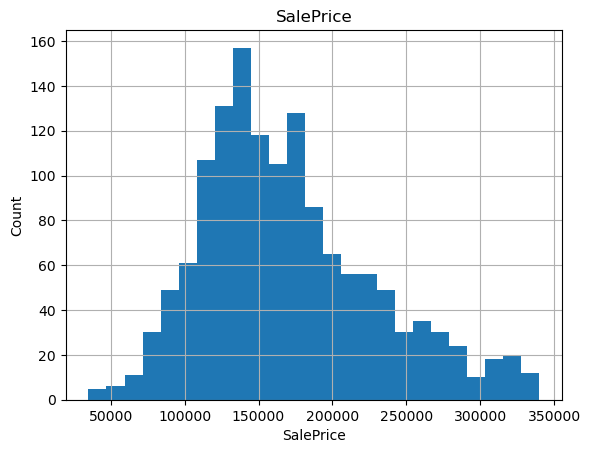

In [35]:
### Lets analyze the continous values by creating histograms to understand the distribution
data=df.copy()
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

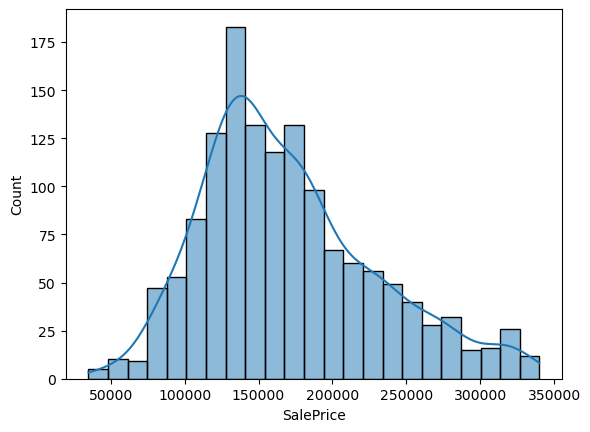

In [36]:
sns.histplot(data['SalePrice'],kde=True)

# _________________________________________________

# End

# ___________________________________________